# Exploratory Data Analysis (EDA)

Now that we have performed the data cleaning, we can start exploring the data to understand the relationships between the features and the target variable. We will start by loading the data and checking the first few rows.

## Load the data and create variables

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from marketing_case.config import INTERIM_DATA_FILE, PROCESSED_DATA_FILE, REPORTS_FIGURES_FOLDER
from marketing_case.plots import customized_pairplot
from marketing_case.utils import StatisticalAnalysisBinary


In [2]:
# fastparquet is better to handle the category type
df = pd.read_parquet(INTERIM_DATA_FILE, engine="fastparquet")

df.head()

ID   Education Marital_Status   Income Kidhome Teenhome  Recency  \
0  5524  Graduation         Single  58138.0       0        0       58   
1  2174  Graduation         Single  46344.0       1        1       38   
2  4141  Graduation        Partner  71613.0       0        0       26   
3  6182  Graduation        Partner  26646.0       1        0       26   
4  5324         PhD        Partner  58293.0       1        0       94   

   MntWines  MntFruits  MntMeatProducts  ...  MonthsSinceEnrolled  Age  \
0       635         88              546  ...                   22   57   
1        11          1                6  ...                    3   60   
2       426         49              127  ...                   10   49   
3        11          4               20  ...                    4   30   
4       173         43              118  ...                    5   33   

   AgeGroup  MntTotal  MntRegularProds  Children  HasChildren  \
0     46-60      1617             1529         0            0   
1     46-60        27               21         2            1   
2     46-60       776              734         0            0   
3     18-30        53               48         1            1   
4     31-45       422              407         1            1   

   AcceptedCmpTotal HasAcceptedCmp NumTotalPurchases  
0                 0              0                22  
1                 0              0                 4  
2                 0              0                20  
3                 0              0                 6  
4                 0              0                14  

[5 rows x 36 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   2205 non-null   int16   
 1   Education            2205 non-null   category
 2   Marital_Status       2205 non-null   category
 3   Income               2205 non-null   float64 
 4   Kidhome              2205 non-null   category
 5   Teenhome             2205 non-null   category
 6   Recency              2205 non-null   int8    
 7   MntWines             2205 non-null   int16   
 8   MntFruits            2205 non-null   int16   
 9   MntMeatProducts      2205 non-null   int16   
 10  MntFishProducts      2205 non-null   int16   
 11  MntSweetProducts     2205 non-null   int16   
 12  MntGoldProds         2205 non-null   int16   
 13  NumDealsPurchases    2205 non-null   int8    
 14  NumWebPurchases      2205 non-null   int8    
 15  NumCatalogPurchases  

In the previous notebook, we have corrected the data types of the columns. Now, we can use these types to separate the columns into numerical and categorical features:

In [4]:
# get the numeric columns through the dtypes
numeric_continuous_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# drop ID column
numeric_continuous_columns.remove("ID")

# get the categorical columns through the dtypes and exclude the target column
categorical_columns = df.select_dtypes("category").columns.tolist()

categorical_columns.remove("Response")

target_column = "Response"

In [ ]:
numeric_continuous_columns

['Income',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'DaysSinceEnrolled',
 'MonthsSinceEnrolled',
 'Age',
 'MntTotal',
 'MntRegularProds',
 'NumTotalPurchases']

In [6]:
categorical_columns

['Education',
 'Marital_Status',
 'Kidhome',
 'Teenhome',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'AgeGroup',
 'Children',
 'HasChildren',
 'AcceptedCmpTotal',
 'HasAcceptedCmp']

## Numerical features

The `describe` method will give us a summary of the numerical features, including the count, mean, standard deviation, minimum, and maximum values. We can use this information to identify any missing values or outliers.

In [7]:
with pd.option_context("display.float_format", "{:.2f}".format, "display.max_columns", None):
    display(df.describe())

ID    Income  Recency  MntWines  MntFruits  MntMeatProducts  \
count  2205.00   2205.00  2205.00   2205.00    2205.00          2205.00   
mean   5585.44  51622.09    49.01    306.16      26.40           165.31   
std    3247.55  20713.06    28.93    337.49      39.78           217.78   
min       0.00   1730.00     0.00      0.00       0.00             0.00   
25%    2815.00  35196.00    24.00     24.00       2.00            16.00   
50%    5455.00  51287.00    49.00    178.00       8.00            68.00   
75%    8418.00  68281.00    74.00    507.00      33.00           232.00   
max   11191.00 113734.00    99.00   1493.00     199.00          1725.00   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count          2205.00           2205.00       2205.00            2205.00   
mean             37.76             27.13         44.06               2.32   
std              54.82             41.13         51.74               1.89   
min               0.00              0.00          0.00               0.00   
25%               3.00              1.00          9.00               1.00   
50%              12.00              8.00         25.00               2.00   
75%              50.00             34.00         56.00               3.00   
max             259.00            262.00        321.00              15.00   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count          2205.00              2205.00            2205.00   
mean              4.10                 2.65               5.82   
std               2.74                 2.80               3.24   
min               0.00                 0.00               0.00   
25%               2.00                 0.00               3.00   
50%               4.00                 2.00               5.00   
75%               6.00                 4.00               8.00   
max              27.00                28.00              13.00   

       NumWebVisitsMonth  DaysSinceEnrolled  MonthsSinceEnrolled     Age  \
count            2205.00            2205.00              2205.00 2205.00   
mean                5.34             353.72                11.32   45.10   
std                 2.41             202.56                 6.74   11.71   
min                 0.00               0.00                 0.00   18.00   
25%                 3.00             180.00                 6.00   37.00   
50%                 6.00             356.00                11.00   44.00   
75%                 7.00             529.00                17.00   55.00   
max                20.00             699.00                23.00   74.00   

       MntTotal  MntRegularProds  NumTotalPurchases  
count   2205.00          2205.00            2205.00  
mean     606.82           562.76              12.57  
std      601.68           575.94               7.18  
min        5.00             4.00               0.00  
25%       69.00            56.00               6.00  
50%      397.00           343.00              12.00  
75%     1047.00           964.00              18.00  
max     2525.00          2491.00              32.00

The same method can be used for the categorical features, but it will only show the count, unique values, top value, and frequency of the top value. We can use this information to identify any missing values or the distribution of the categories.

In [8]:
df.describe(exclude="number")

Education Marital_Status  Kidhome  Teenhome  AcceptedCmp3  \
count         2205           2205     2205      2205          2205   
unique           5              2        3         3             2   
top     Graduation        Partner        0         0             0   
freq          1113           1422     1276      1139          2042   

        AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
count           2205          2205          2205          2205      2205   
unique             2             2             2             2         2   
top                0             0             0             0         0   
freq            2041          2044          2063          2175      2185   

        Response AgeGroup  Children  HasChildren  AcceptedCmpTotal  \
count       2205     2205      2205         2205              2205   
unique         2        4         4            2                 5   
top            0    31-45         1            1                 0   
freq        1872      958      1112         1577              1747   

        HasAcceptedCmp  
count             2205  
unique               2  
top                  0  
freq              1747

In [9]:
len(numeric_continuous_columns), len(categorical_columns)

(19, 15)

Let's check the distribution of the numerical features:

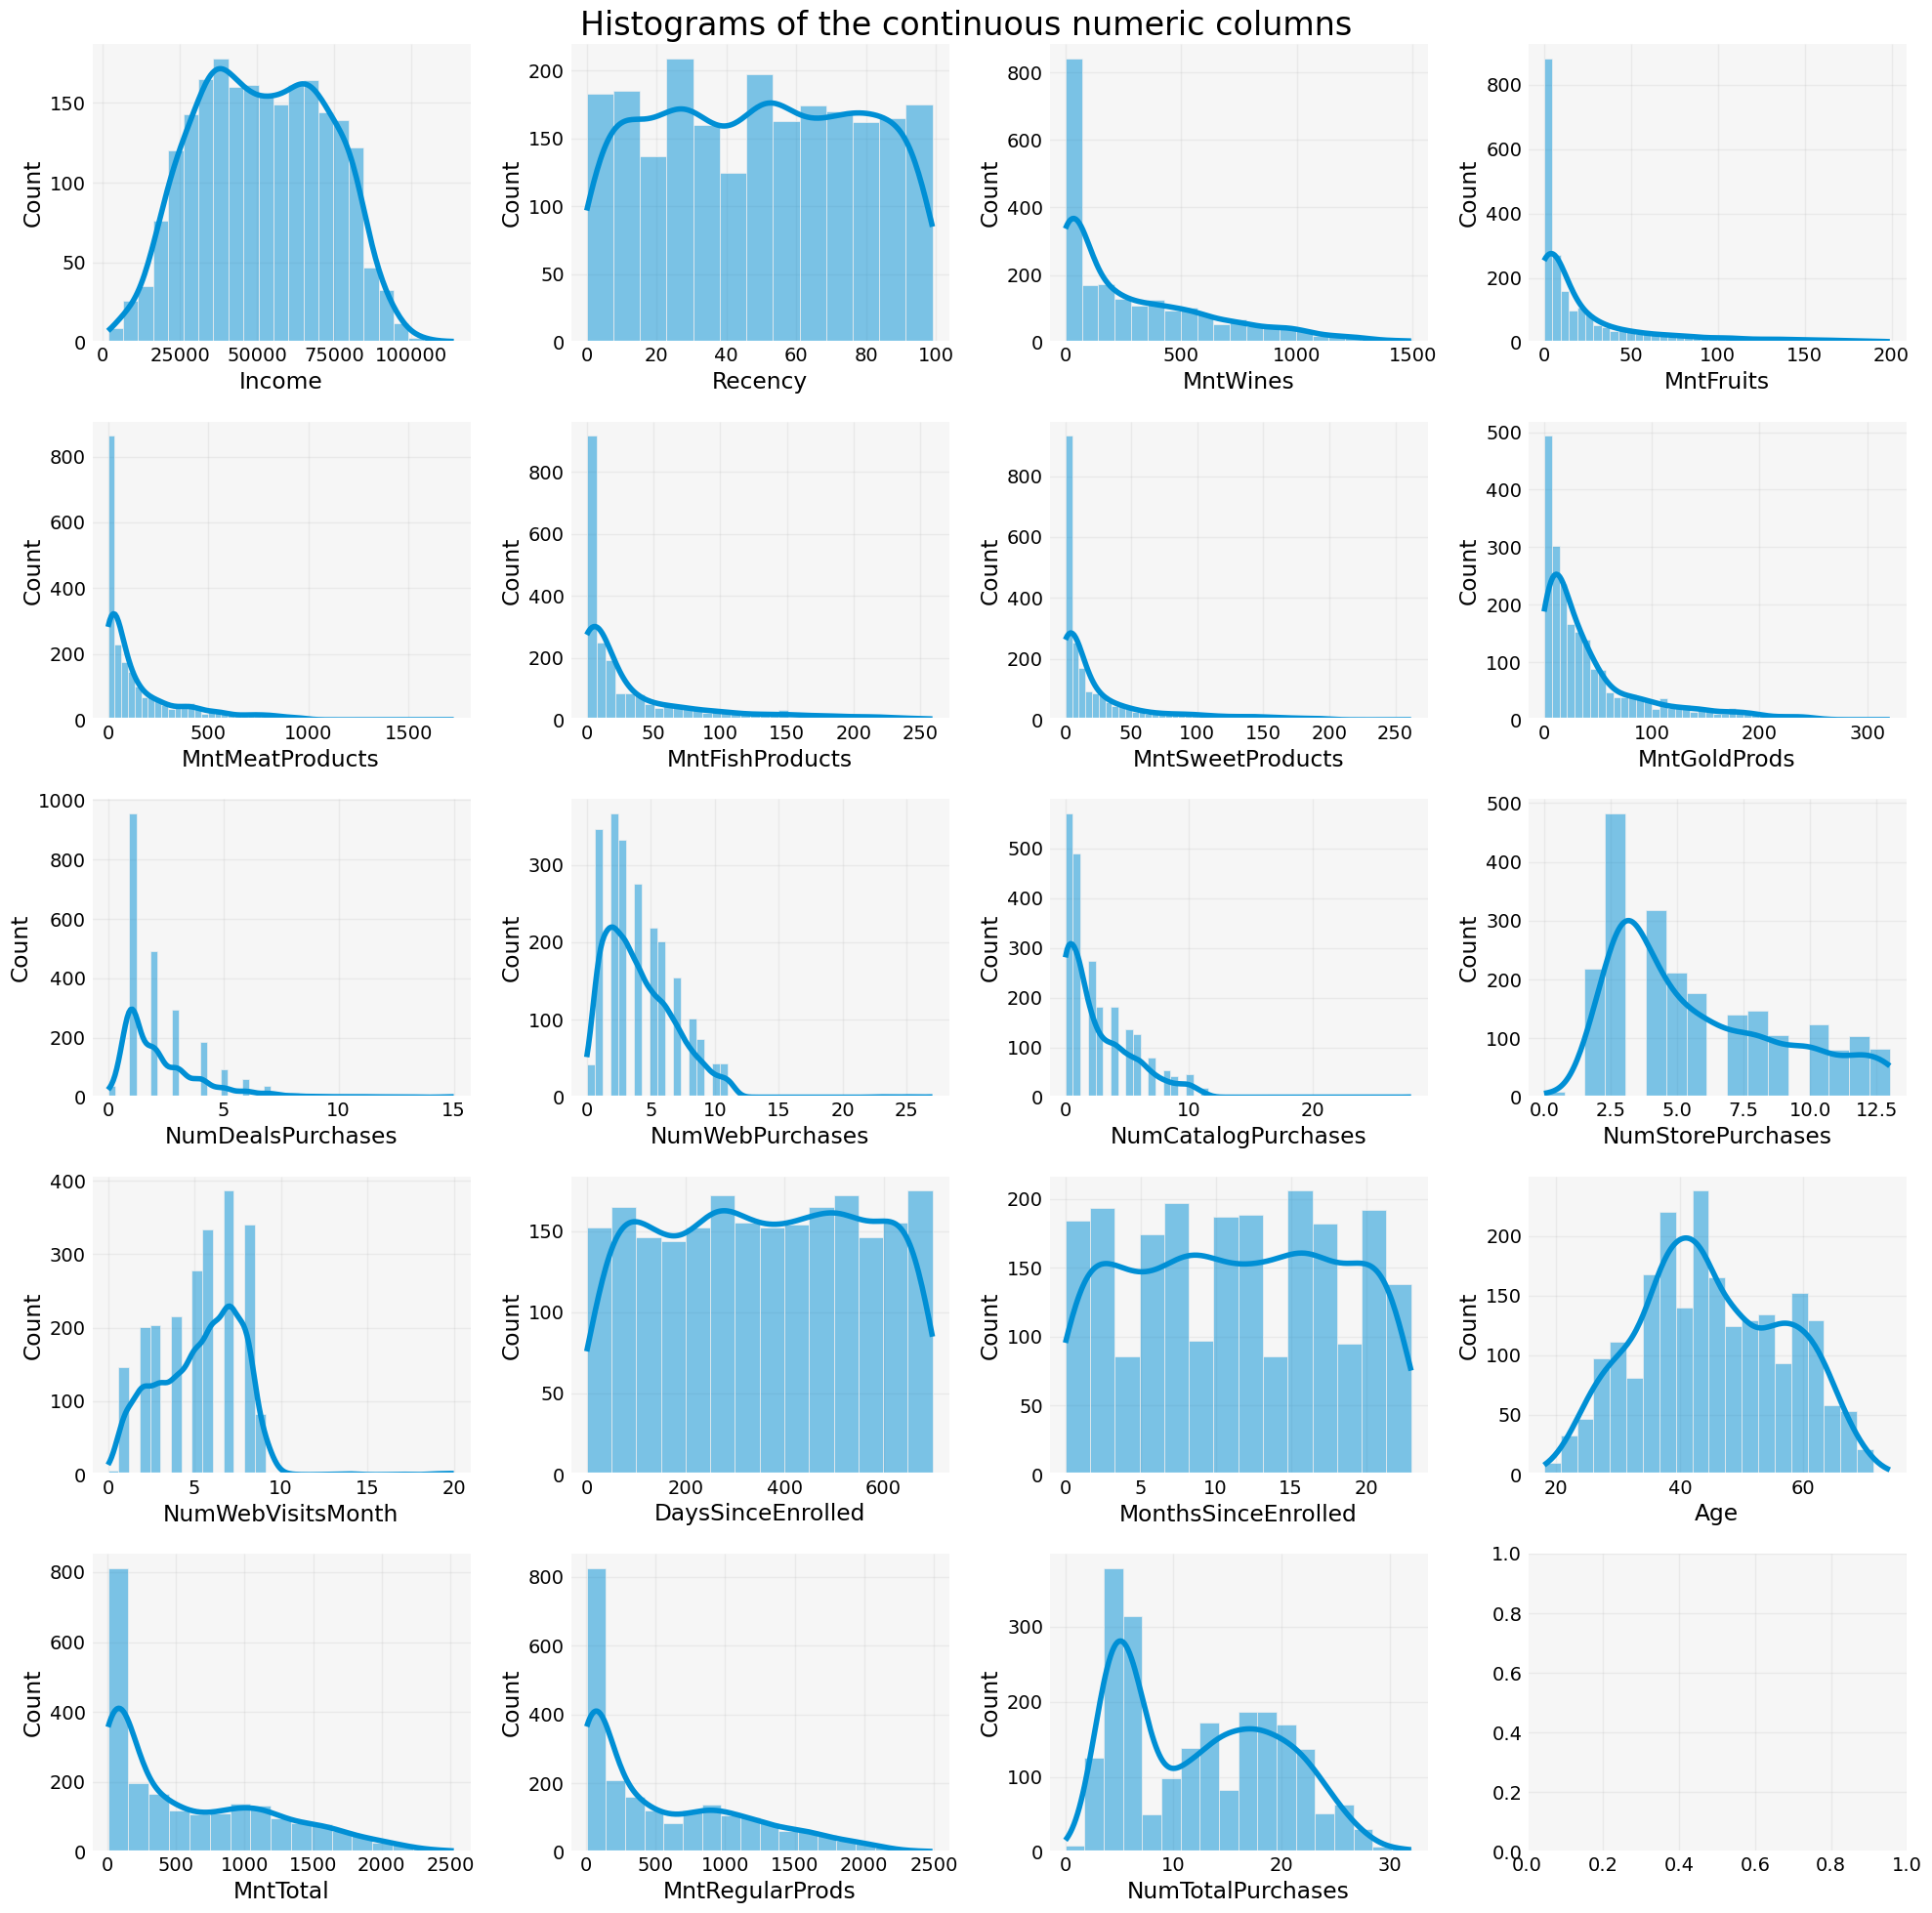

In [10]:
fig, axs = plt.subplots(5, 4, figsize=(20, 20), tight_layout=True)

for ax, column in zip(axs.ravel(), numeric_continuous_columns):
    h = sns.histplot(
        data=df,
        x=column,
        ax=ax,
        kde=True,
    )

fig.suptitle("Histograms of the continuous numeric columns")

plt.show()

Since we are dealing with a classification problem, we can use the target column as `hue` to see how the features are distributed for each class:

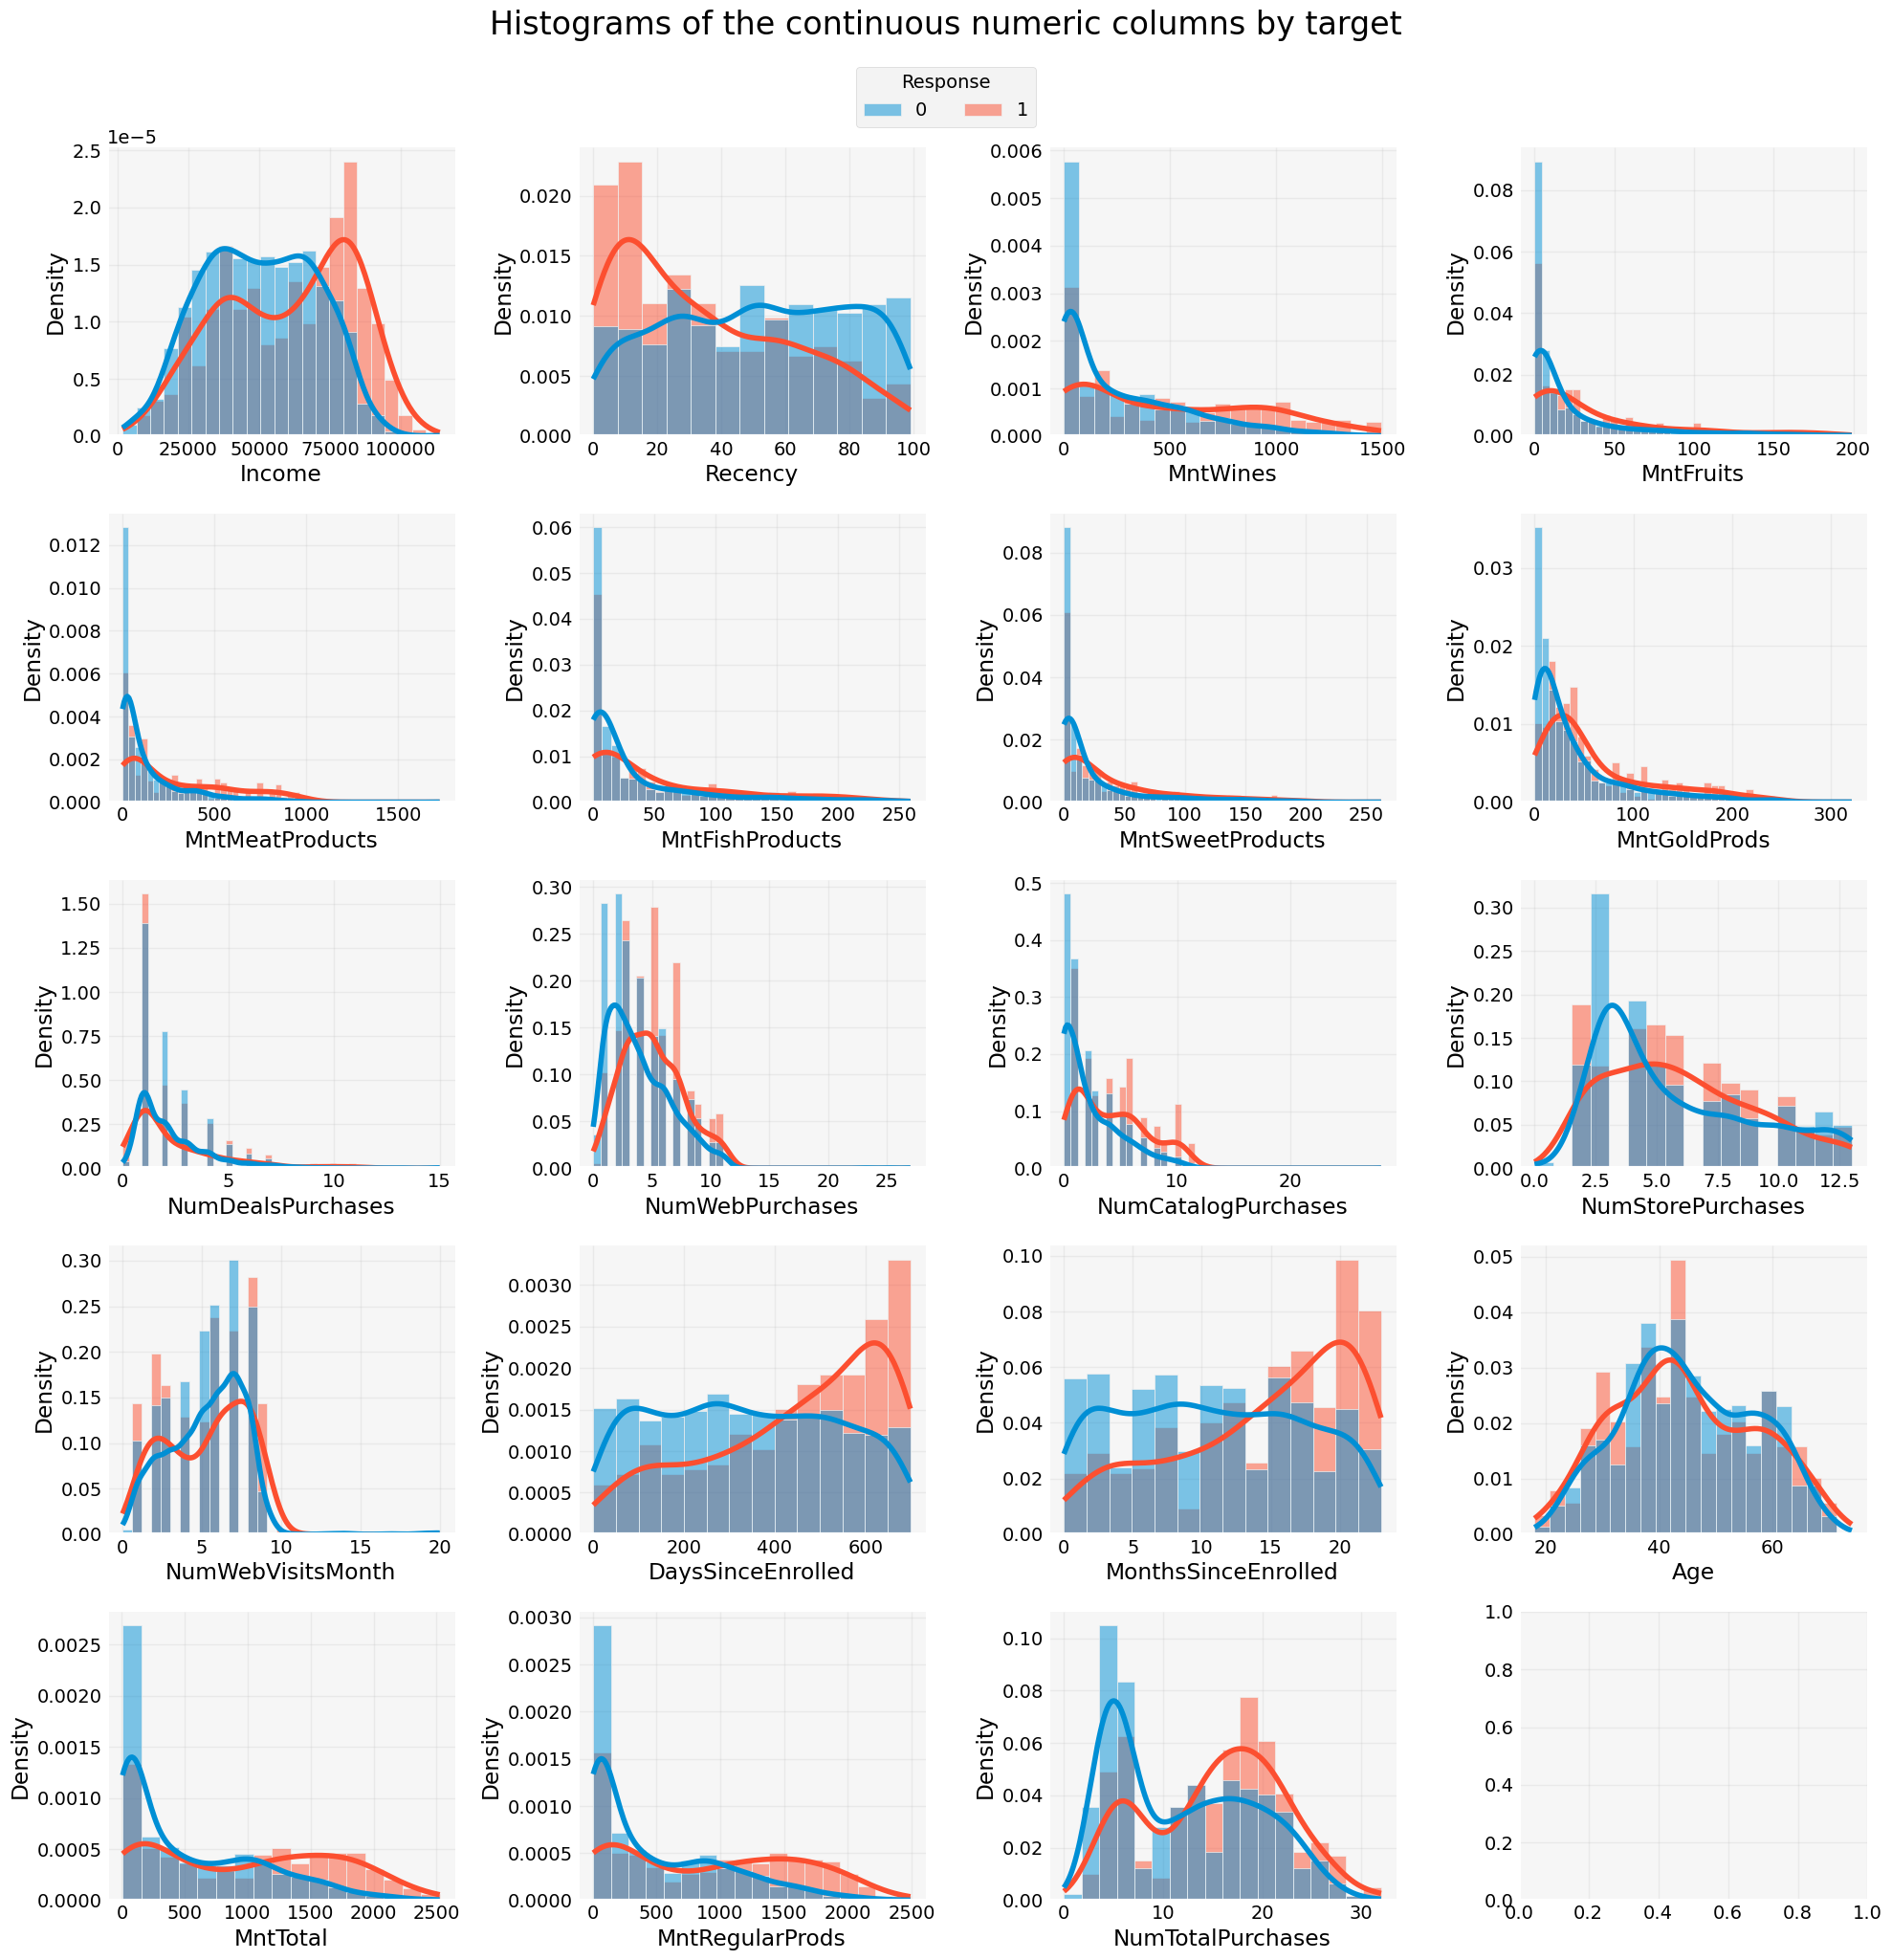

In [11]:
fig, axs = plt.subplots(5, 4, figsize=(20, 20), tight_layout=True)

for ax, column in zip(axs.ravel(), numeric_continuous_columns):
    h = sns.histplot(
        data=df,
        x=column,
        ax=ax,
        kde=True,
        hue=target_column,
        common_norm=False,
        stat="density",
    )

    legend = h.get_legend()
    if legend:
        legend.remove()

labels = [text.get_text() for text in legend.get_texts()]

fig.legend(
    handles=legend.legend_handles,
    labels=labels,
    loc="upper center",
    ncols=df[target_column].nunique(),
    title="Response",
    bbox_to_anchor=(0.5, 1.0),
)
fig.suptitle("Histograms of the continuous numeric columns by target", y=1.025,)

file_name = "01_histograms_continuous_numeric_columns_by_target.png"
file_destination = REPORTS_FIGURES_FOLDER / file_name

fig.savefig(file_destination)

plt.show()

As can be seen, some features have a different distribution for each class, which indicates that they may be useful for predicting the target variable. Later, we will use statistical tests to assert which features are significant for the classification.

## Categorical features

We can also check how the categorical features are distributed for each class:

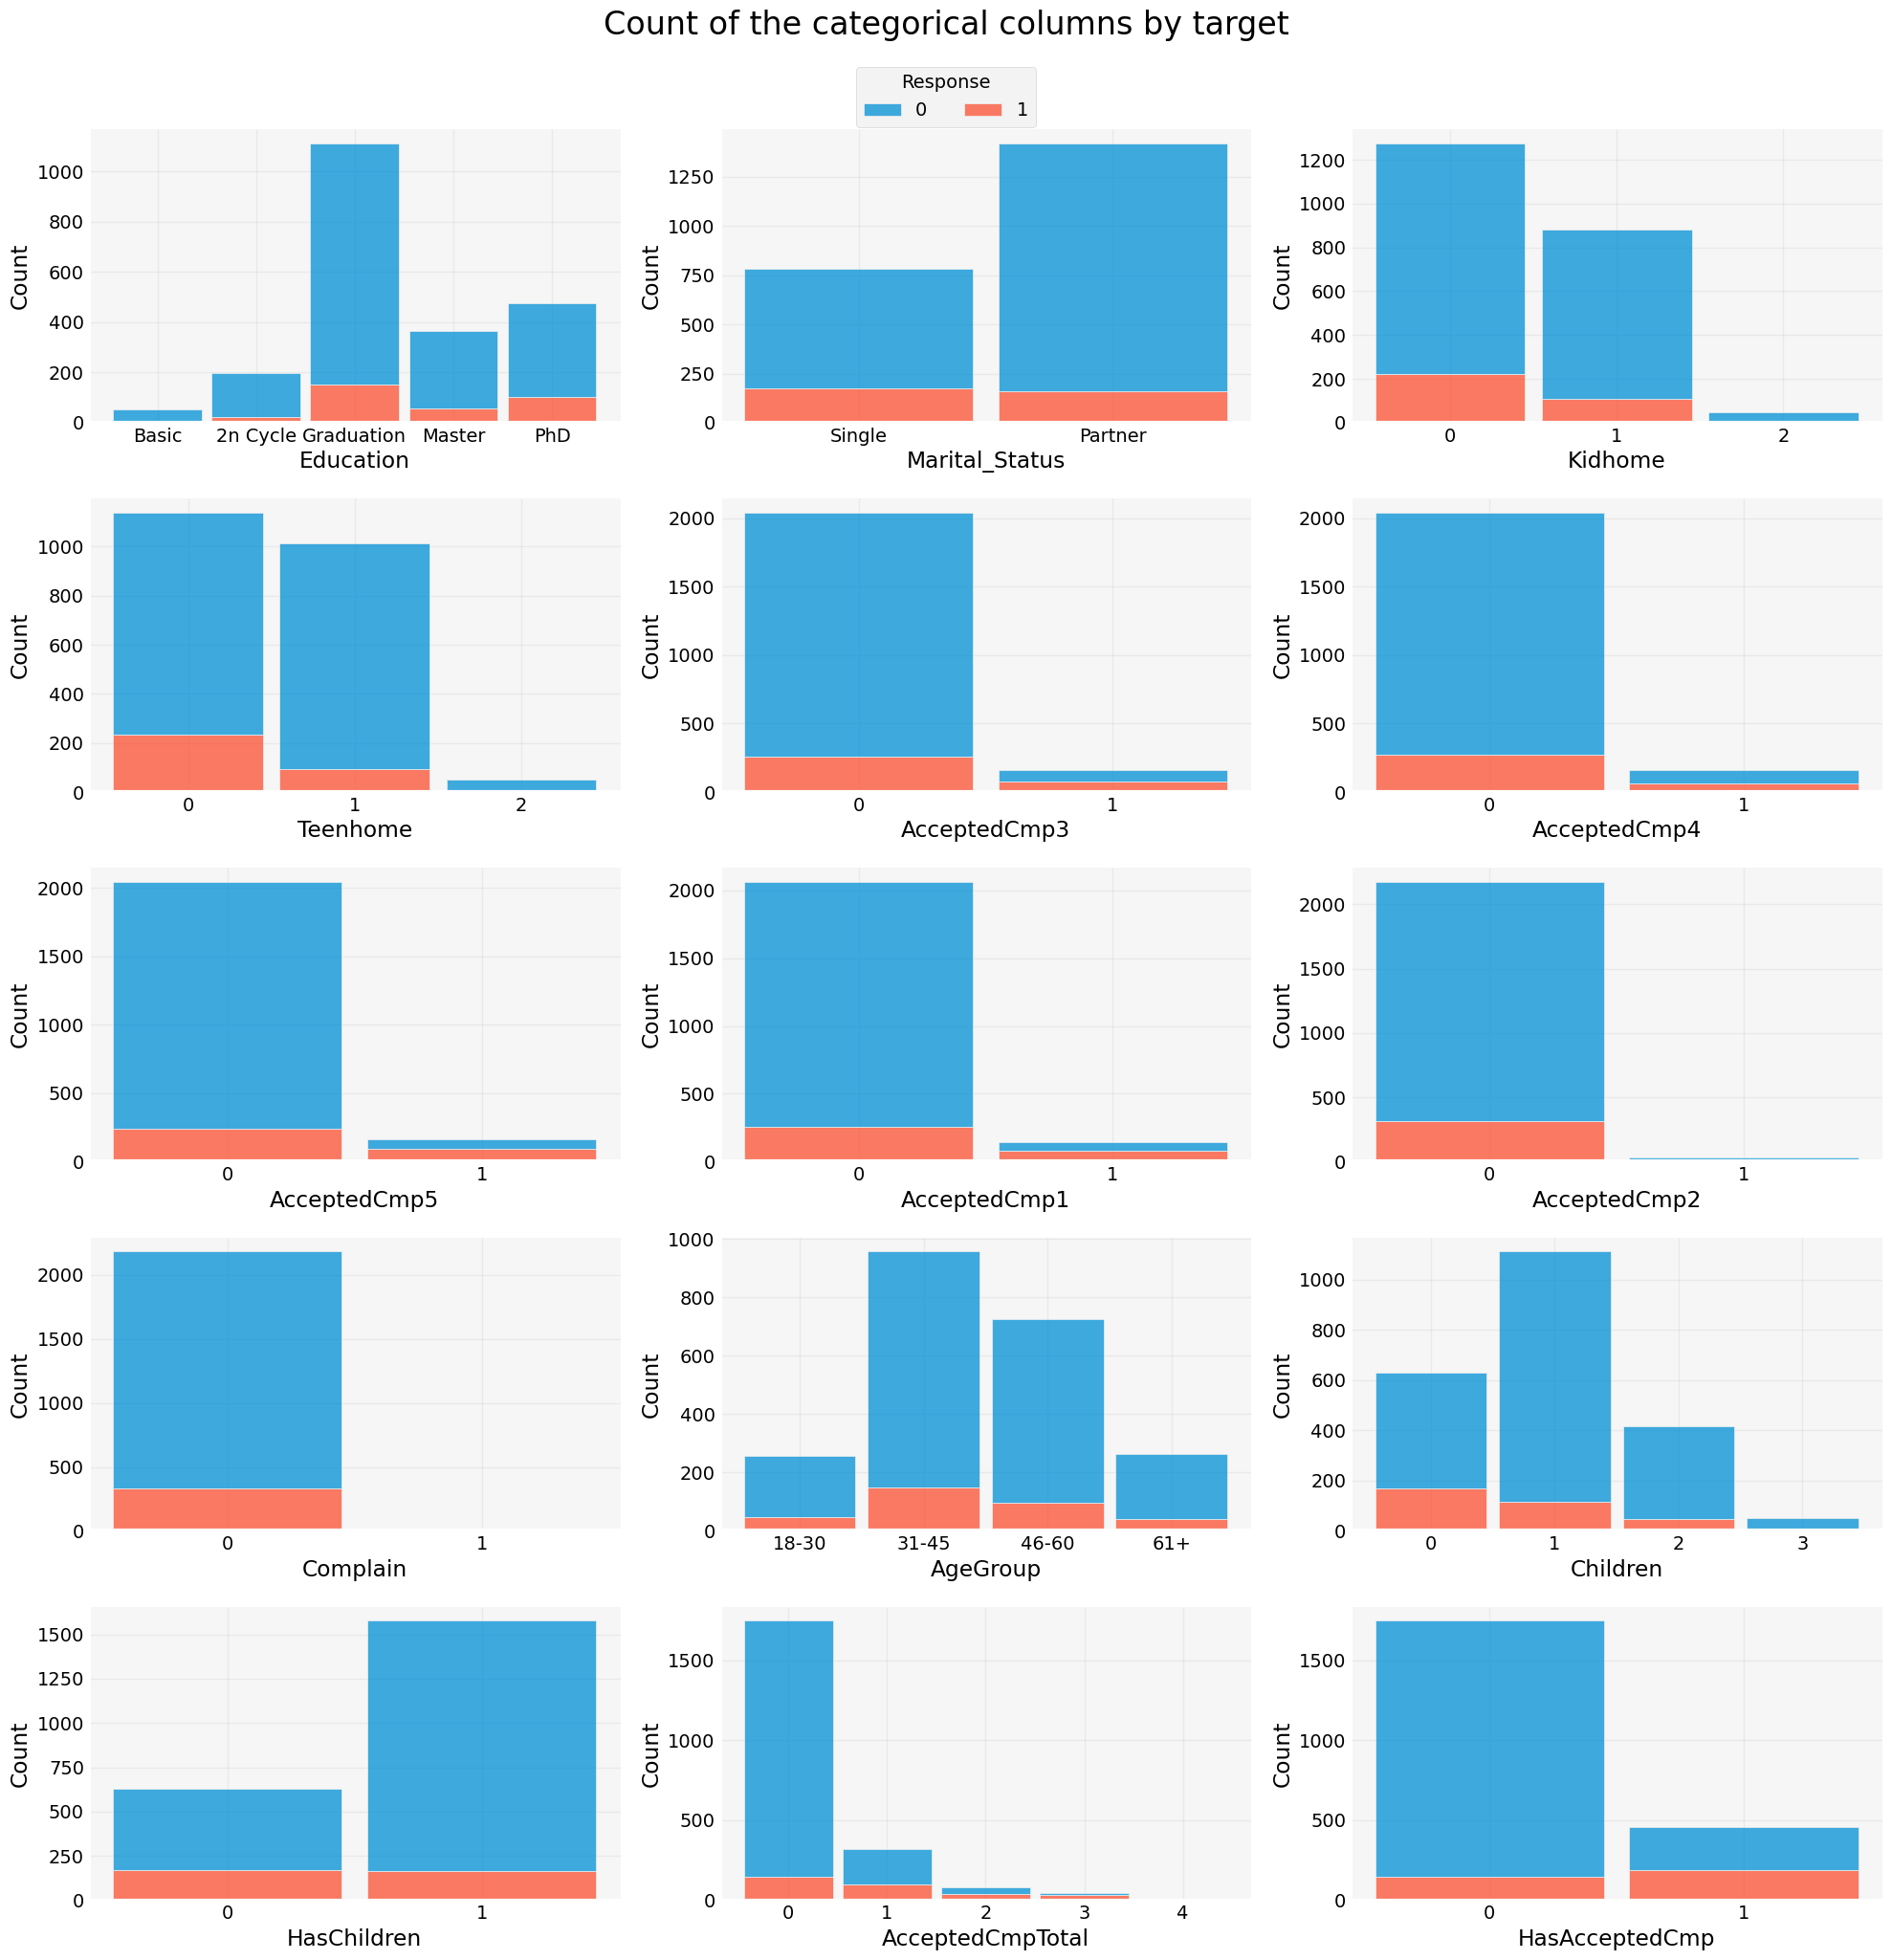

In [12]:
fig, axs = plt.subplots(5, 3, figsize=(20, 20), tight_layout=True)

for ax, column in zip(axs.ravel(), categorical_columns):
    h = sns.histplot(
        data=df,
        x=column,
        ax=ax,
        hue=target_column,
        multiple="stack",
        shrink=0.9,
    )

    # check if ticks is a list of floats
    if all(isinstance(x, float) for x in h.get_xticks()):
        ticks = range(df[column].nunique())
        h.set_xticks(ticks, ticks)

    legend = h.get_legend()
    if legend:
        legend.remove()

labels = [text.get_text() for text in legend.get_texts()]

fig.legend(
    handles=legend.legend_handles,
    labels=labels,
    loc="upper center",
    ncols=df[target_column].nunique(),
    title="Response",
    bbox_to_anchor=(0.5, 1.0),
)
fig.suptitle("Count of the categorical columns by target", y=1.025,)


plt.show()

Besides the count of each category, we can also check the percentage of each category for each class:

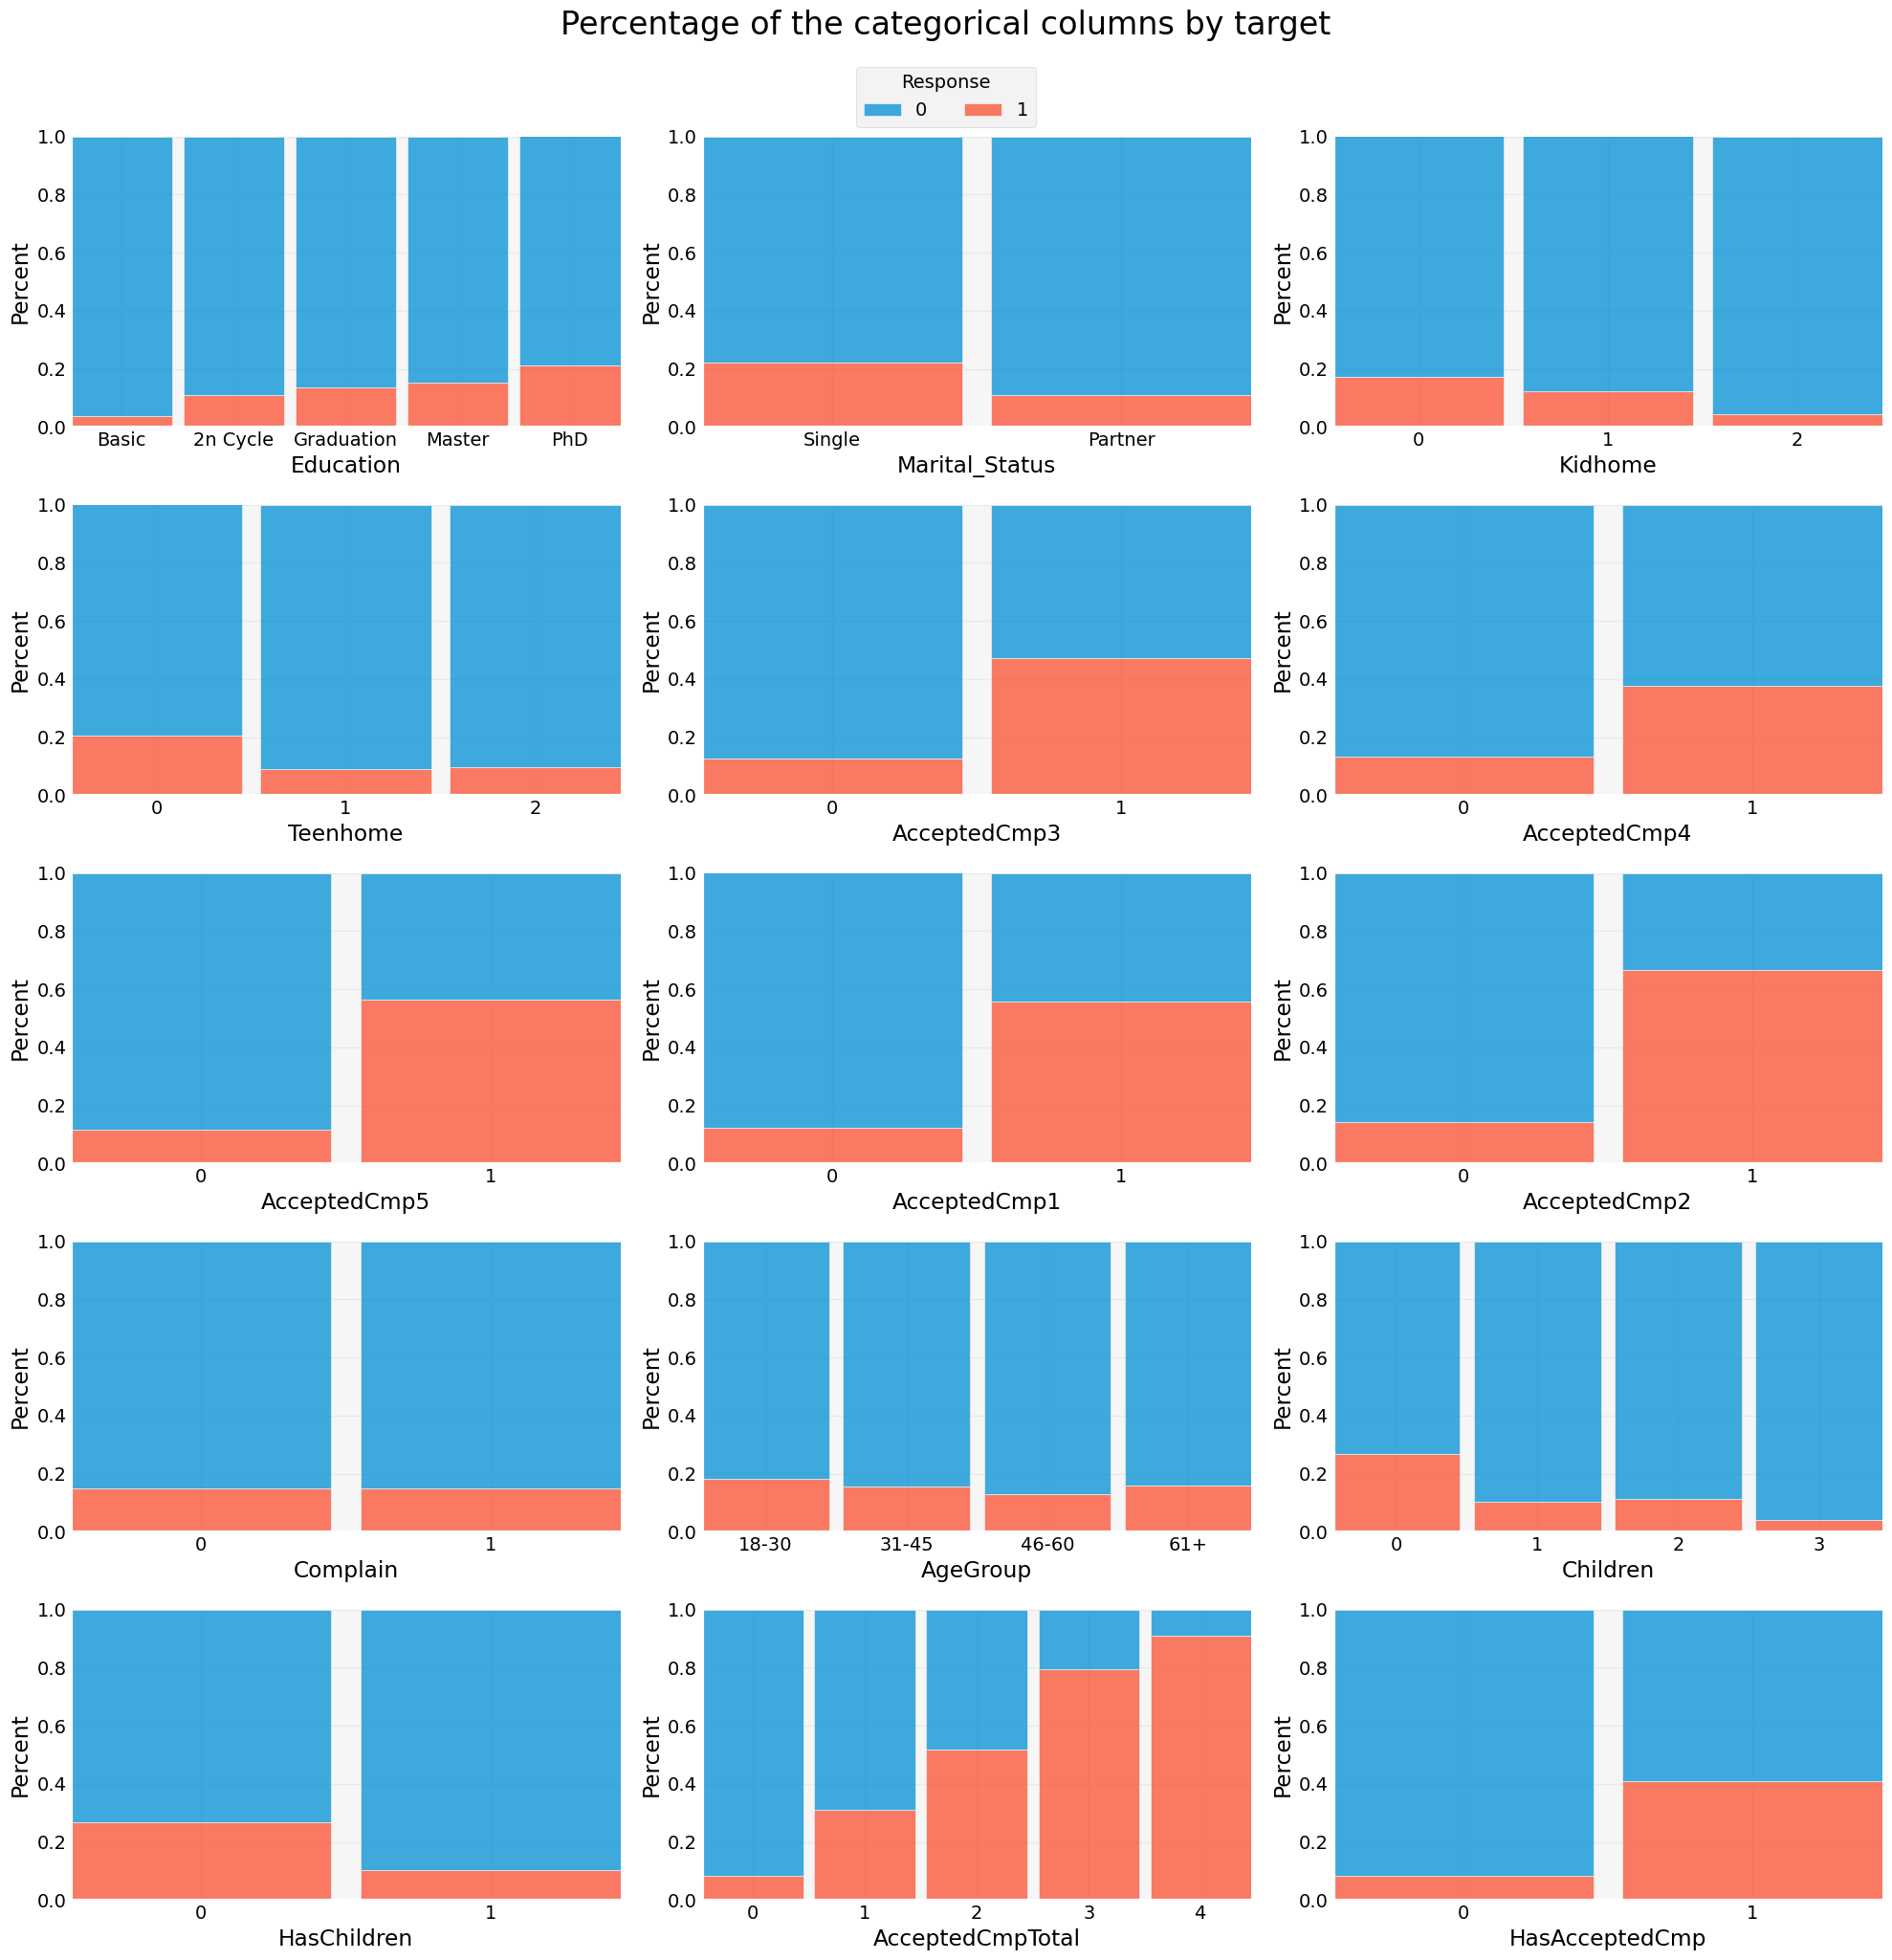

In [13]:
fig, axs = plt.subplots(5, 3, figsize=(20, 20), tight_layout=True)

for ax, column in zip(axs.ravel(), categorical_columns):
    h = sns.histplot(
        data=df,
        x=column,
        ax=ax,
        hue=target_column,
        multiple="fill",
        stat="percent",
        shrink=0.9,
    )

    # check if ticks is a list of floats
    if all(isinstance(x, float) for x in h.get_xticks()):
        ticks = range(df[column].nunique())
        h.set_xticks(ticks, ticks)

    legend = h.get_legend()
    if legend:
        legend.remove()

labels = [text.get_text() for text in legend.get_texts()]

fig.legend(
    handles=legend.legend_handles,
    labels=labels,
    loc="upper center",
    ncols=df[target_column].nunique(),
    title="Response",
    bbox_to_anchor=(0.5, 1.0),
)
fig.suptitle("Percentage of the categorical columns by target", y=1.025,)

file_name = "01_categorical_columns_by_target.png"
file_destination = REPORTS_FIGURES_FOLDER / file_name

fig.savefig(file_destination)

plt.show()

We have seen in the previous notebook that the target variable is imbalanced, with the majority of the samples belonging to the negative class. This is also reflected in the distribution of the categorical features, where the majority of the samples belong to the most frequent category.

Nonetheless, when we consider the percentage of each category for each class, we can see that some categories have a different distribution for each class. This indicates that these features may be useful for predicting the target variable.

Look how the features `Education`, `Marital_Status`, `HasChildren` and `HasAcceptedCmp` have a different distribution for each class. This indicates that these features may be useful for predicting the target variable. Later, we will use statistical tests to assert which features are significant for the classification.


## Pairplots

Pairplots are a great way to visualize the relationships between the features. It shows the scatter plots of each pair of features and the diagonal shows the distribution of each feature. We can use the `hue` parameter to color the points according to a categorical feature or the target variable.

We will focus on some numerical features:

In [14]:
columns_analysis = [
    "Income",
    "Recency",
    "DaysSinceEnrolled",
    "Age",
    "MntTotal",
]

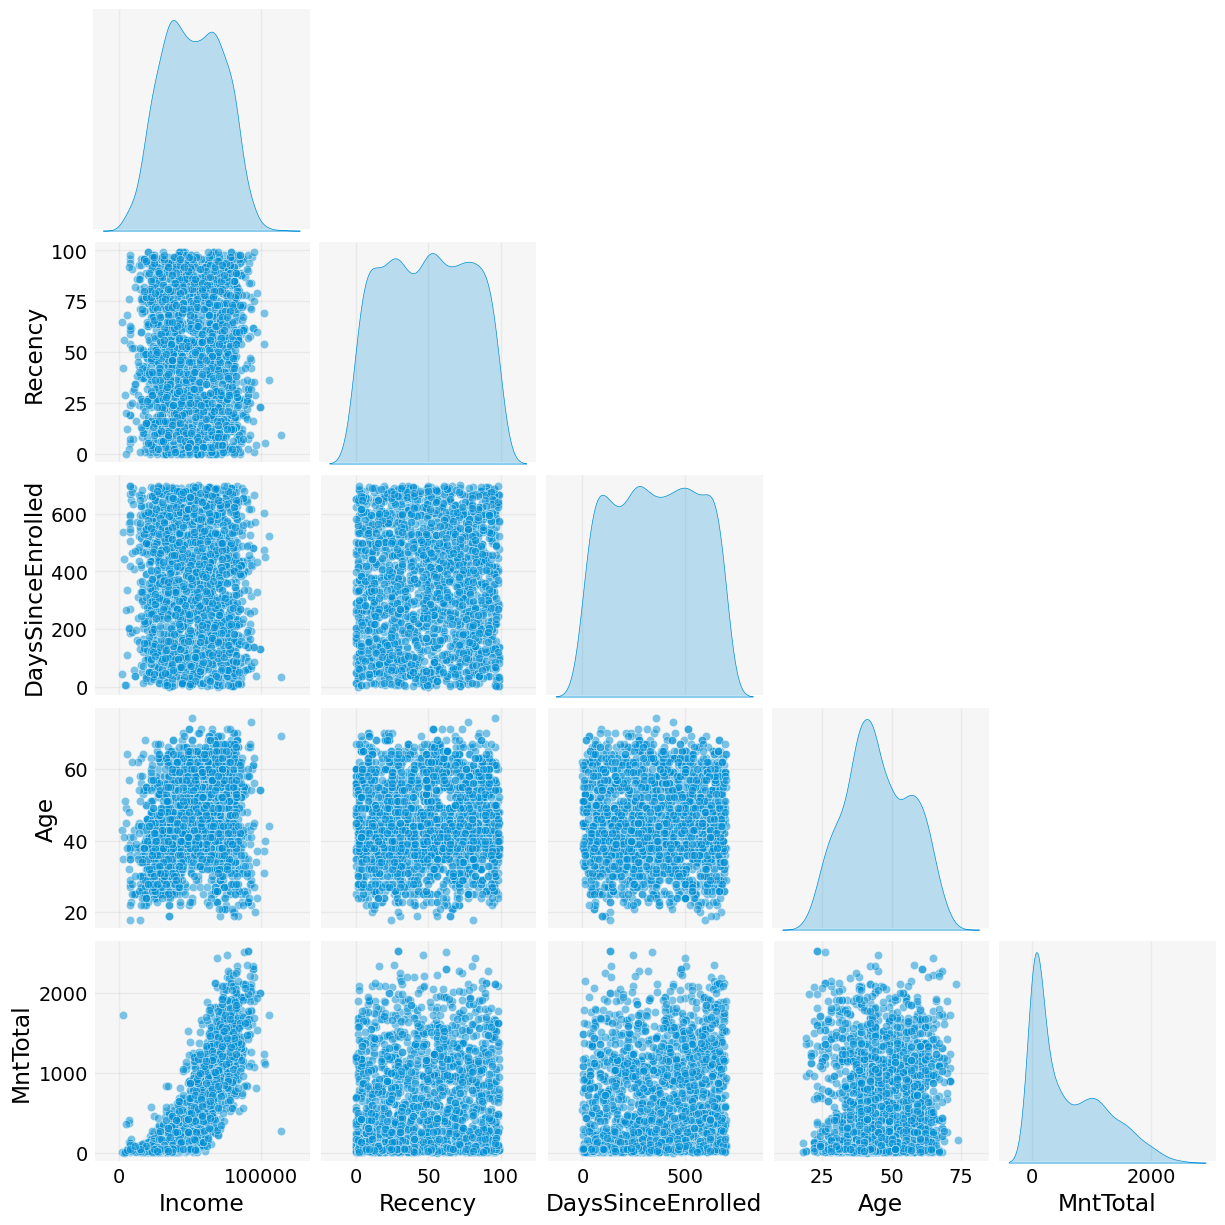

In [15]:
customized_pairplot(df, columns_analysis)

We have seen before that some categorical features have a different distribution for each class. We can use the `hue` parameter to color the points according to these features:

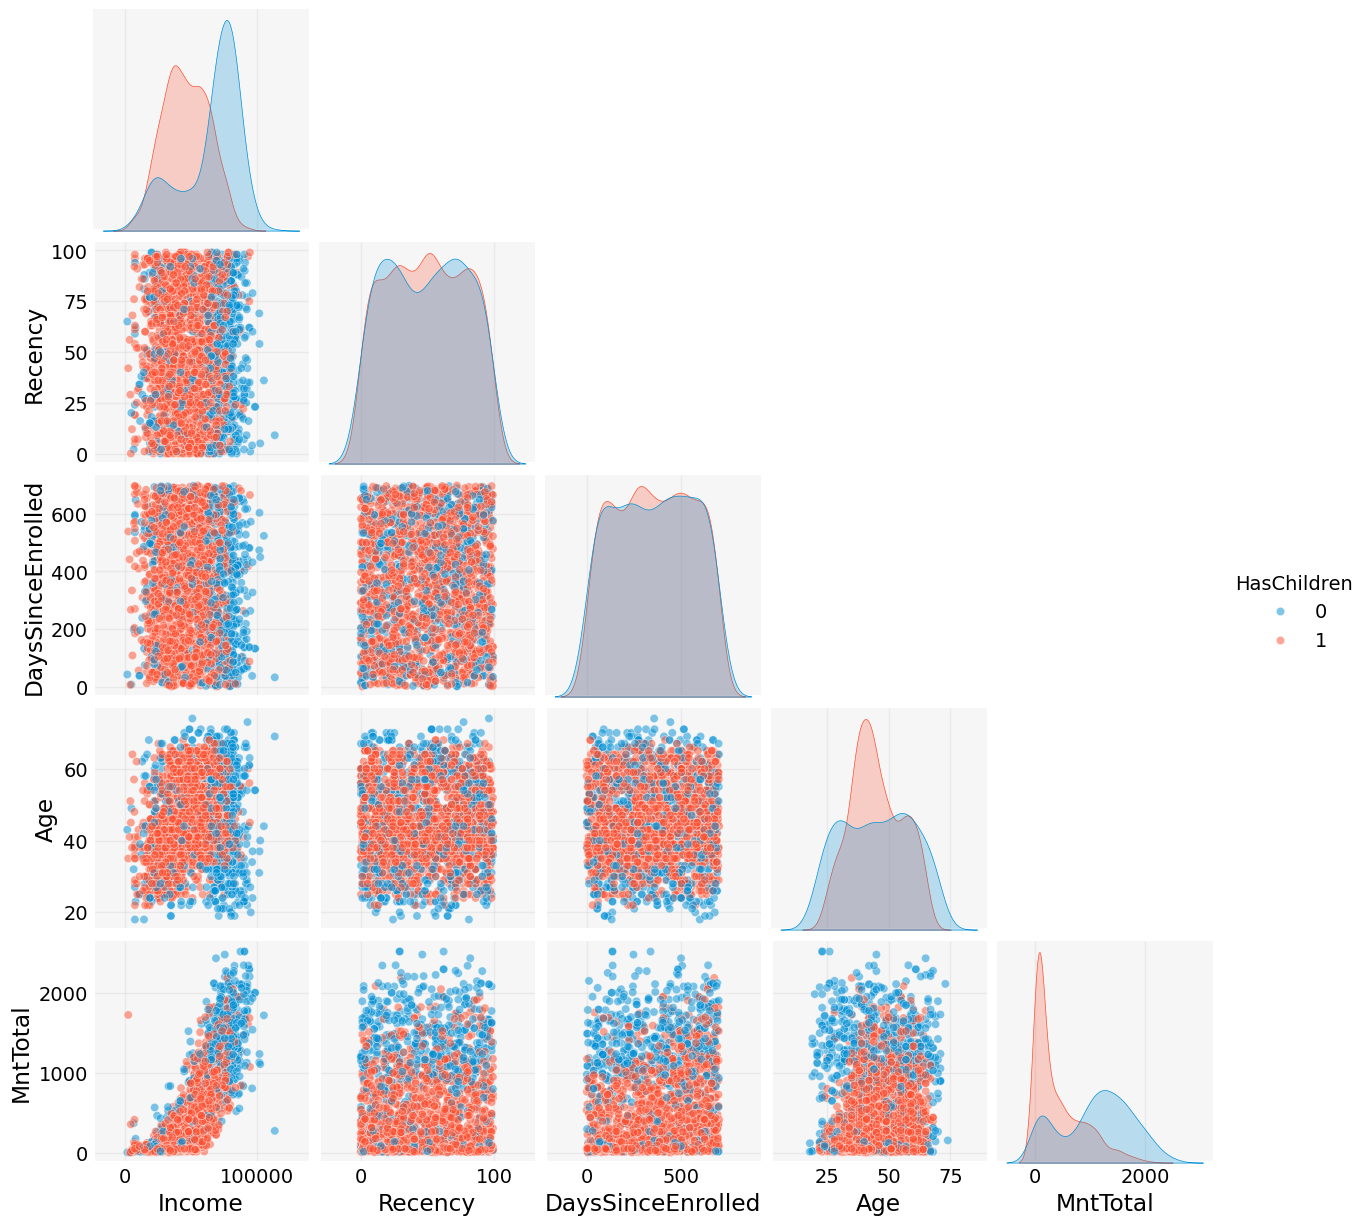

In [16]:
customized_pairplot(df, columns_analysis, hue_column="HasChildren")

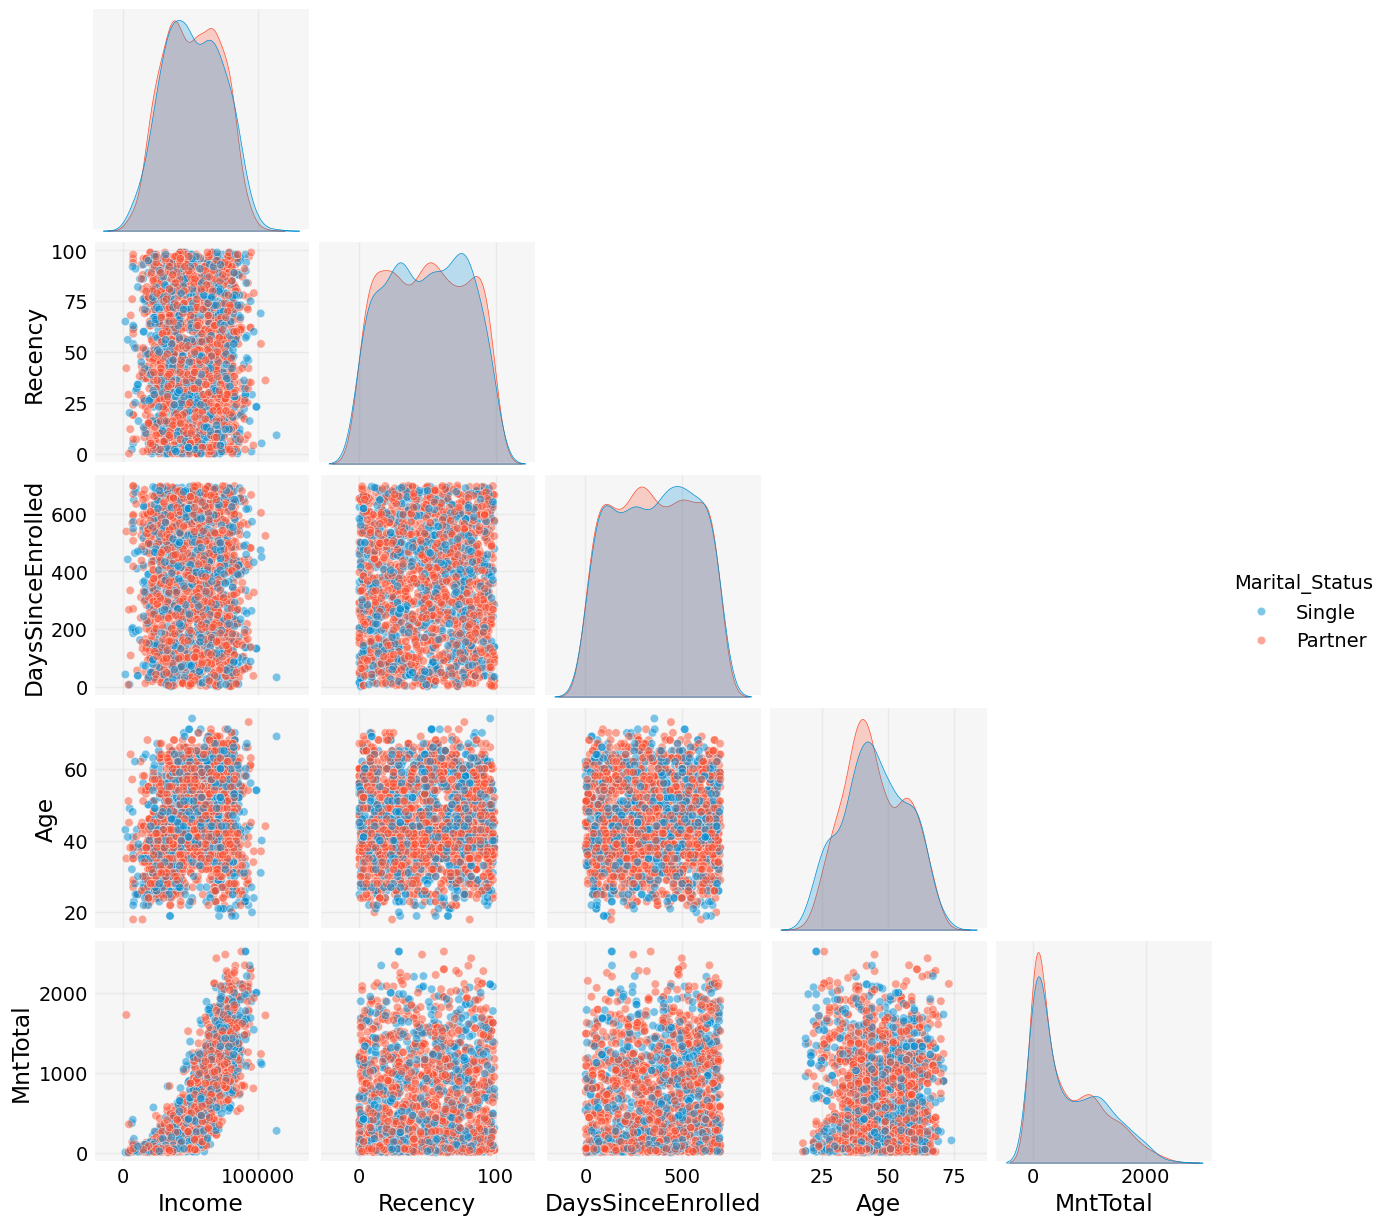

In [17]:
customized_pairplot(df, columns_analysis, hue_column="Marital_Status")

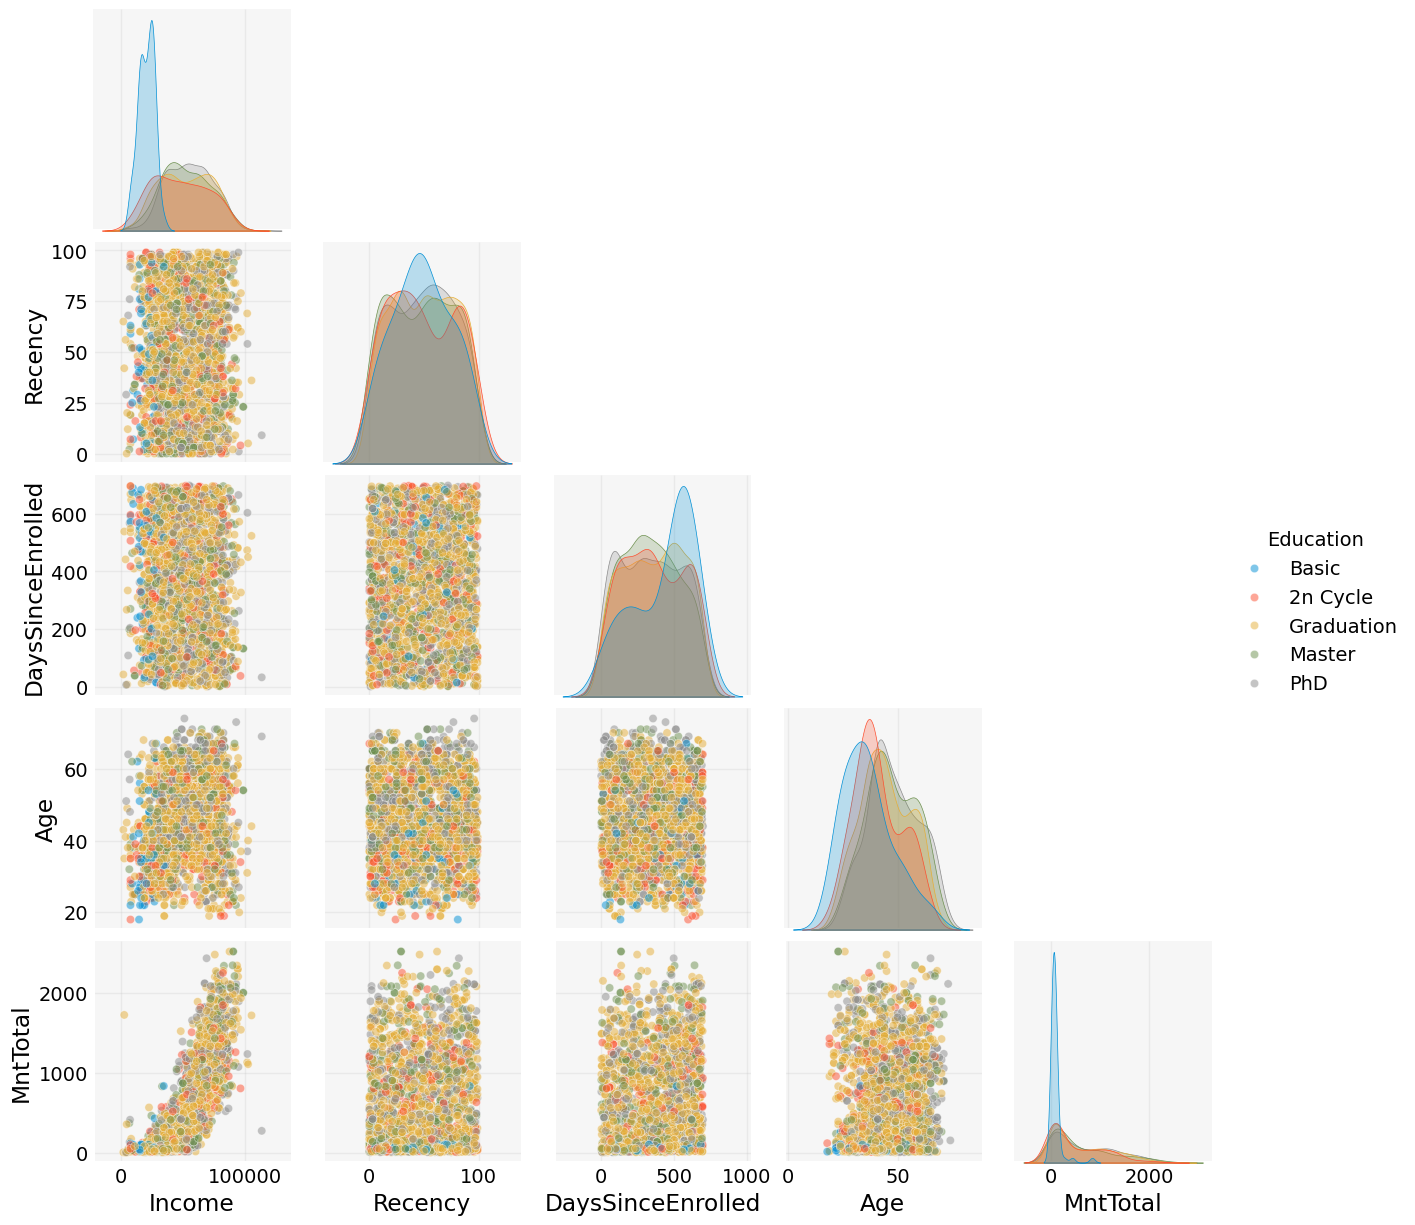

In [18]:
customized_pairplot(df, columns_analysis, hue_column="Education")

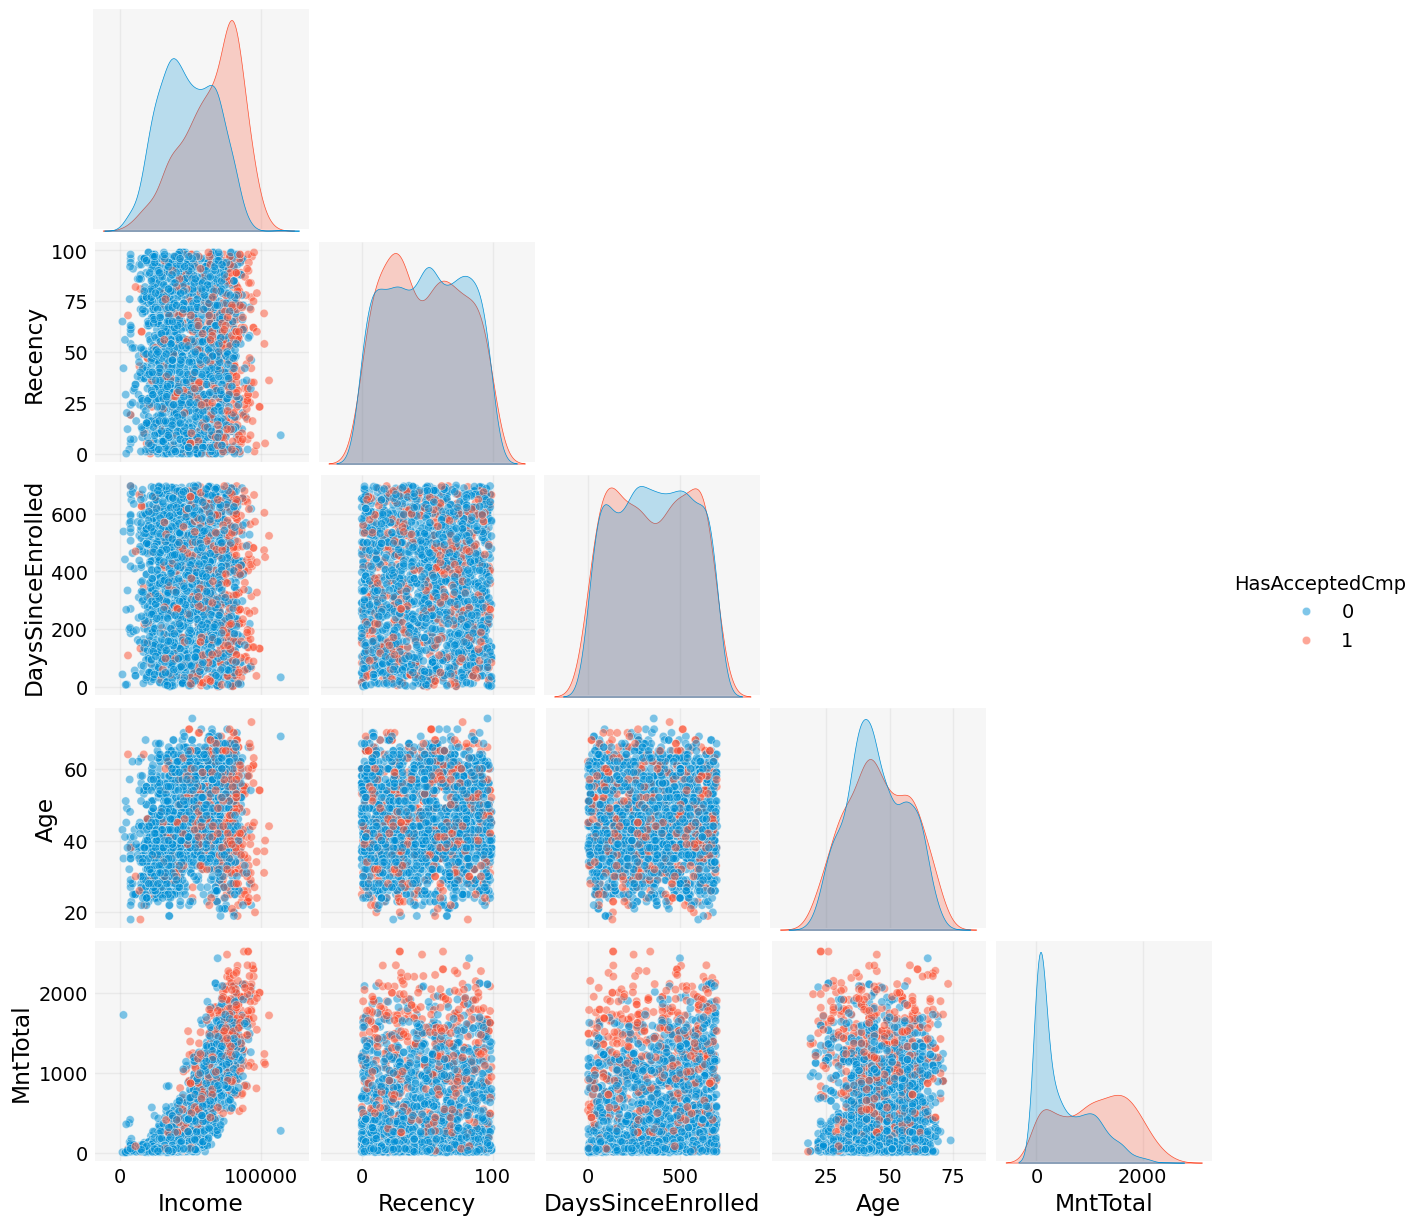

In [19]:
customized_pairplot(df, columns_analysis, hue_column="HasAcceptedCmp")

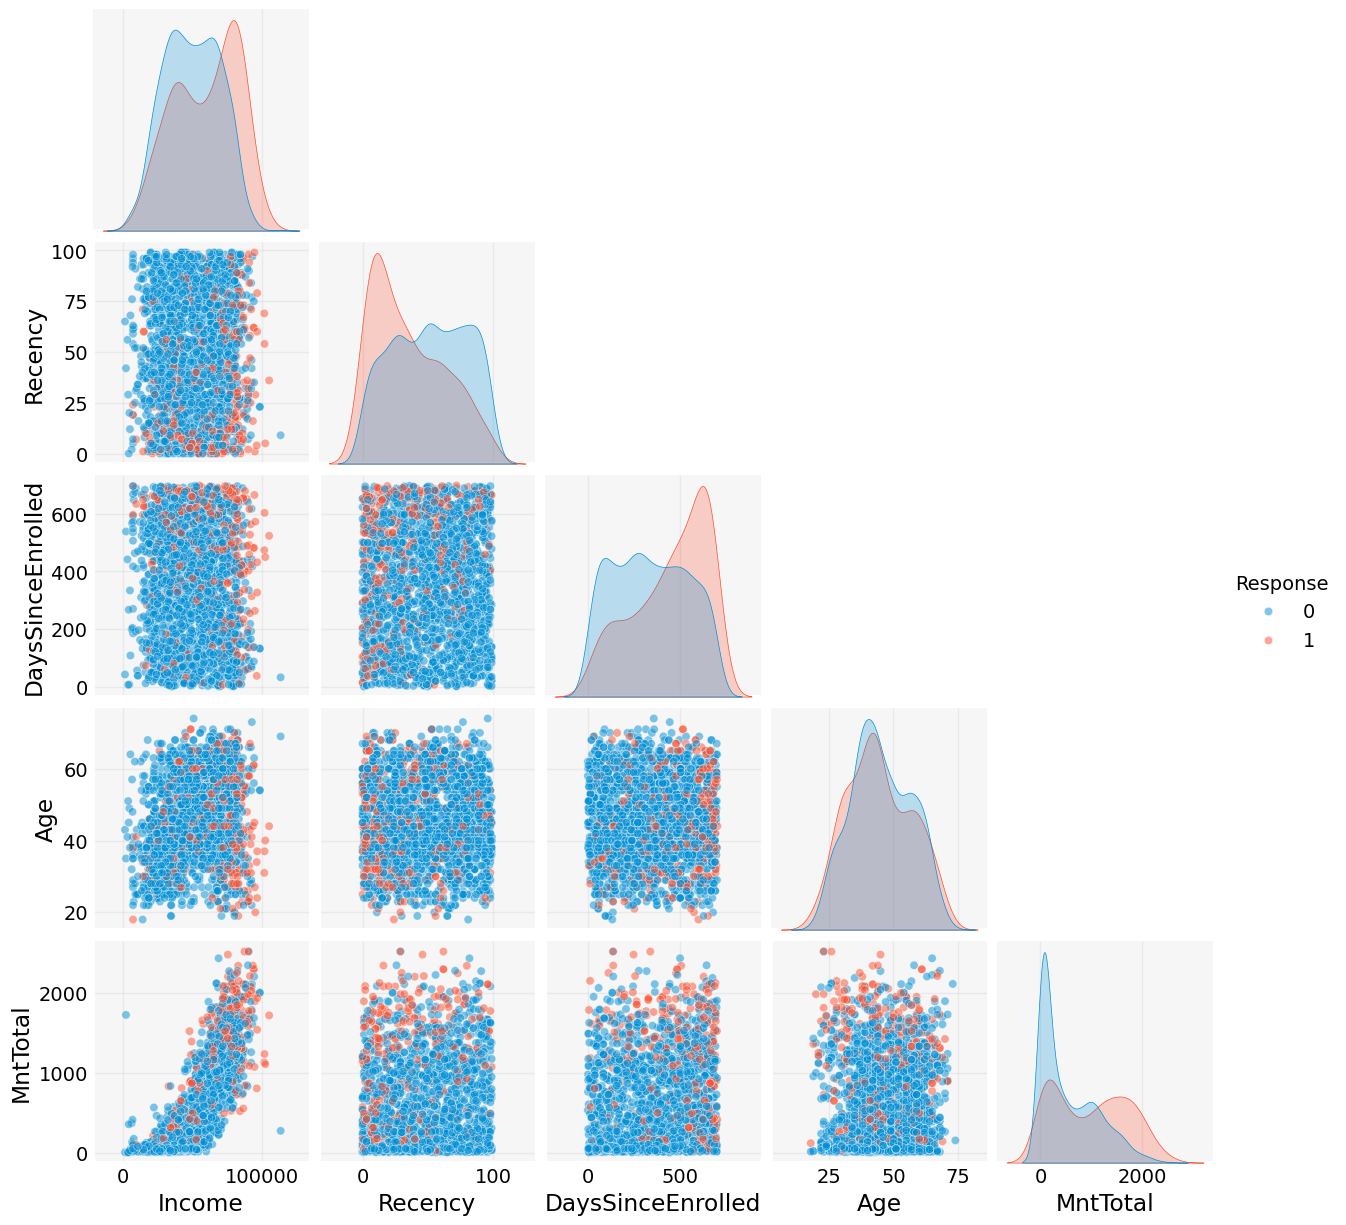

In [20]:
customized_pairplot(df, columns_analysis, hue_column="Response")

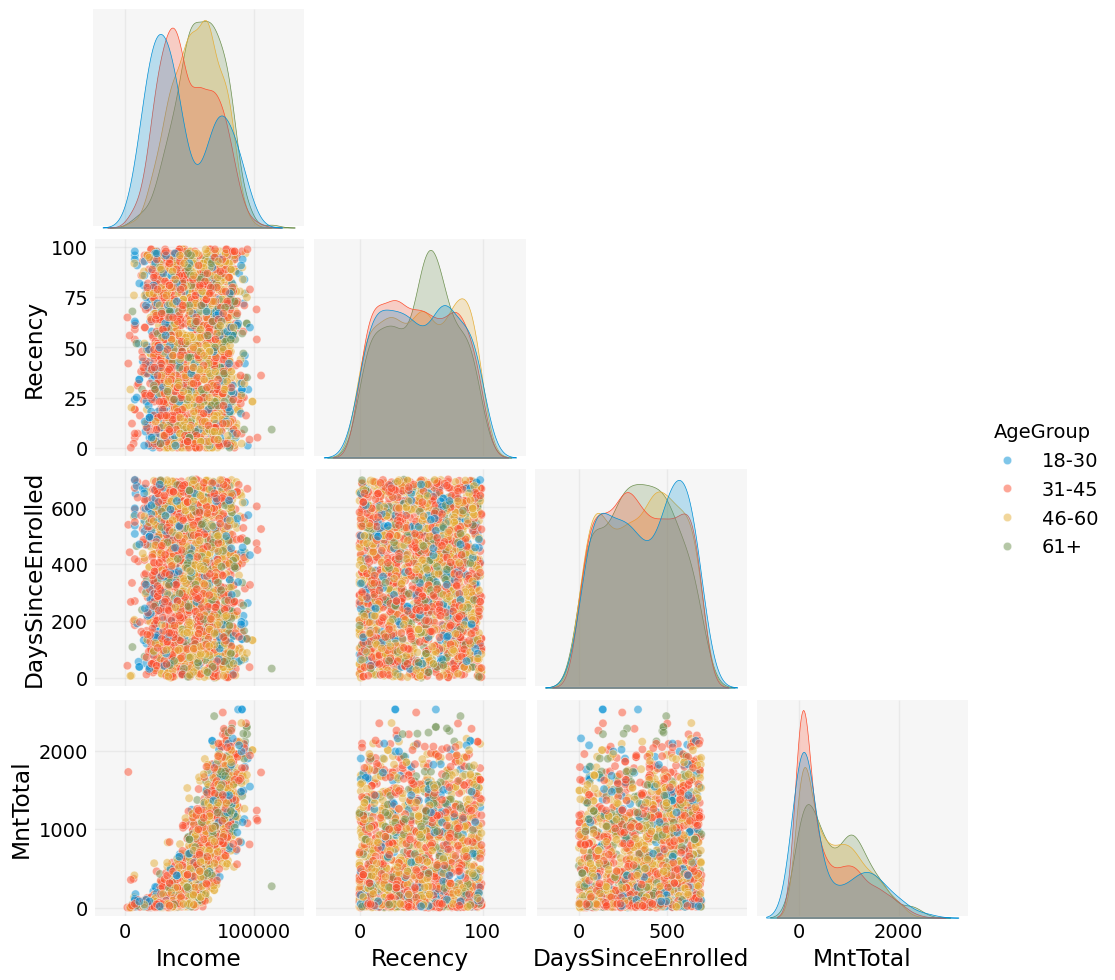

In [21]:
columns_analysis_without_age = columns_analysis.copy()
columns_analysis_without_age.remove("Age")

customized_pairplot(df, columns_analysis_without_age, "AgeGroup")

Even though the plots are not very clear, we can see that some features have a different distribution for each class. This indicates that these features may be useful for predicting the target variable.

We can perform some statistical tests to assert which features are significant for the classification.

## Statistical tests

The class `StatisticalAnalysisBinary` was especially created to perform statistical tests for binary classification problems:

In [22]:
stats = StatisticalAnalysisBinary(df, target_column)

Let's begin by checking the normality and the shape of the distributions of the numerical features:

In [23]:
stats.shapiro_wilk(columns=numeric_continuous_columns)

column  statistic       p_value  normal
0                Income   0.984484  9.196588e-15   False
1               Recency   0.954360  1.052504e-25   False
2              MntWines   0.839901  1.536300e-42   False
3             MntFruits   0.690608  3.753674e-53   False
4       MntMeatProducts   0.744669  6.225924e-50   False
5       MntFishProducts   0.709697  4.504738e-52   False
6      MntSweetProducts   0.689237  3.155904e-53   False
7          MntGoldProds   0.770816  3.628449e-48   False
8     NumDealsPurchases   0.747405  9.369904e-50   False
9       NumWebPurchases   0.907681  1.309538e-34   False
10  NumCatalogPurchases   0.842350  2.630923e-42   False
11    NumStorePurchases   0.901472  1.674428e-35   False
12    NumWebVisitsMonth   0.928696  3.500808e-31   False
13    DaysSinceEnrolled   0.953830  7.719534e-26   False
14  MonthsSinceEnrolled   0.951956  2.632678e-26   False
15                  Age   0.983354  2.238506e-15   False
16             MntTotal   0.865637  6.359473e-40   False
17      MntRegularProds   0.857223  8.057386e-41   False
18    NumTotalPurchases   0.933694  2.981924e-30   False

In [24]:
stats.shape_analysis(columns=numeric_continuous_columns)

column  skewness skewness_classification  kurtosis  \
0                Income  0.013164               symmetric -0.847564   
1               Recency -0.001874               symmetric -1.198443   
2              MntWines  1.166917            right-skewed  0.574909   
3             MntFruits  2.099281            right-skewed  4.050778   
4       MntMeatProducts  1.818916            right-skewed  3.248138   
5       MntFishProducts  1.912028            right-skewed  3.056338   
6      MntSweetProducts  2.098355            right-skewed  4.079829   
7          MntGoldProds  1.834468            right-skewed  3.143759   
8     NumDealsPurchases  2.312369            right-skewed  8.186671   
9       NumWebPurchases  1.201376            right-skewed  4.101823   
10  NumCatalogPurchases  1.368122            right-skewed  3.210414   
11    NumStorePurchases  0.706960            right-skewed -0.635247   
12    NumWebVisitsMonth  0.229994            right-skewed  1.904398   
13    DaysSinceEnrolled -0.019176               symmetric -1.202857   
14  MonthsSinceEnrolled -0.012741               symmetric -1.198781   
15                  Age  0.089941            right-skewed -0.797036   
16             MntTotal  0.859552            right-skewed -0.335066   
17      MntRegularProds  0.915811            right-skewed -0.218527   
18    NumTotalPurchases  0.292470            right-skewed -1.127287   

   kurtosis_classification  
0              platykurtic  
1              platykurtic  
2              leptokurtic  
3              leptokurtic  
4              leptokurtic  
5              leptokurtic  
6              leptokurtic  
7              leptokurtic  
8              leptokurtic  
9              leptokurtic  
10             leptokurtic  
11             platykurtic  
12             leptokurtic  
13             platykurtic  
14             platykurtic  
15             platykurtic  
16             platykurtic  
17             platykurtic  
18             platykurtic

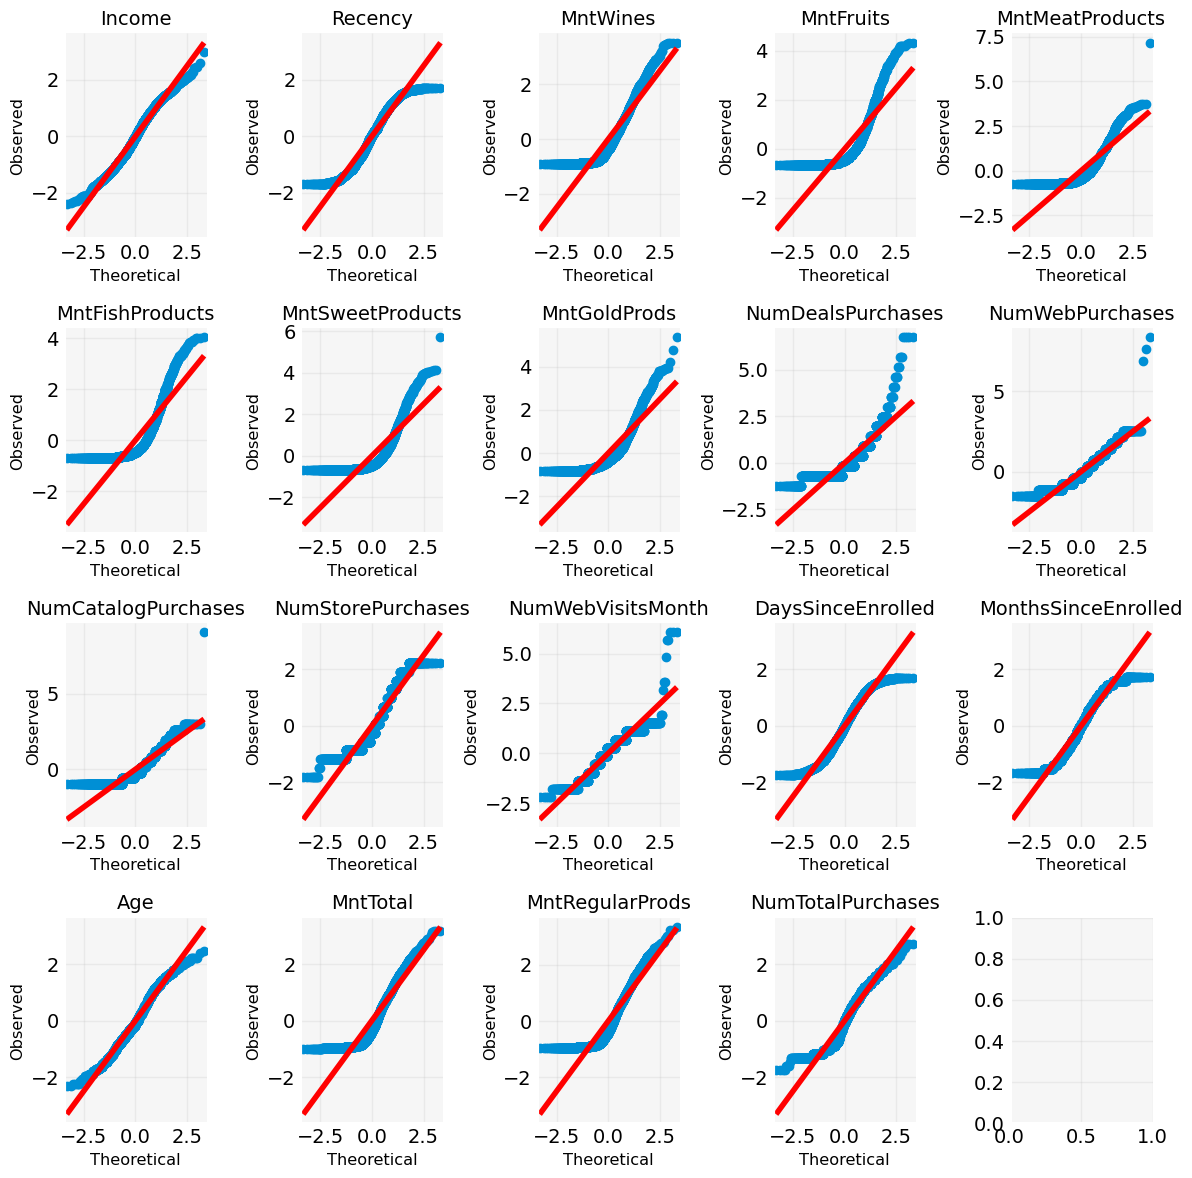

In [25]:
stats.plot_qqplot(columns=numeric_continuous_columns)

None of the features have a normal distribution, and most of them have a right-skewed distribution. We can use the Mann-Whitney U test to check if the distributions of the features are significantly different for each class:

In [26]:
stats.mann_whitney(columns=numeric_continuous_columns)

column  statistic       p_value  different_distributions
0                Income   228756.5  9.413861e-15                     True
1               Recency   412223.5  5.890759e-21                     True
2              MntWines   212525.5  1.981404e-20                     True
3             MntFruits   238314.0  6.129924e-12                     True
4       MntMeatProducts   199579.5  1.149479e-25                     True
5       MntFishProducts   255215.5  1.217701e-07                     True
6      MntSweetProducts   244447.5  2.898424e-10                     True
7          MntGoldProds   220569.0  1.694373e-17                     True
8     NumDealsPurchases   329319.0  8.324204e-02                    False
9       NumWebPurchases   226771.0  1.273662e-15                     True
10  NumCatalogPurchases   196406.0  7.035959e-28                     True
11    NumStorePurchases   287906.0  2.505406e-02                     True
12    NumWebVisitsMonth   306749.0  6.416552e-01                    False
13    DaysSinceEnrolled   212731.0  2.375330e-20                     True
14  MonthsSinceEnrolled   212105.0  1.265925e-20                     True
15                  Age   322843.5  2.972334e-01                    False
16             MntTotal   191794.5  4.088880e-29                     True
17      MntRegularProds   196259.5  4.155002e-27                     True
18    NumTotalPurchases   229177.5  1.169361e-14                     True

In [27]:
# filter only the False values
stats.mann_whitney(columns=numeric_continuous_columns).query(
    "different_distributions == False"
)

column  statistic   p_value  different_distributions
8   NumDealsPurchases   329319.0  0.083242                    False
12  NumWebVisitsMonth   306749.0  0.641655                    False
15                Age   322843.5  0.297233                    False

Concerning the categorical features, we can use the chi-square test to check if each category is significantly different for each class:

In [28]:
stats.chi_squared(columns=categorical_columns)

column   statistic       p_value  independent  \
0          Education   23.656607  9.358414e-05        False   
1     Marital_Status   48.873693  2.729878e-12        False   
2            Kidhome   13.860429  9.777909e-04        False   
3           Teenhome   58.015462  2.524076e-13        False   
4       AcceptedCmp3  139.089324  4.210775e-32        False   
5       AcceptedCmp4   69.325569  8.348030e-17        False   
6       AcceptedCmp5  228.927232  1.021640e-51        False   
7       AcceptedCmp1  191.107224  1.822433e-43        False   
8       AcceptedCmp2   59.061336  1.528330e-14        False   
9           Complain    0.000000  1.000000e+00         True   
10          AgeGroup    4.688368  1.960912e-01         True   
11          Children   94.814621  2.023738e-20        False   
12       HasChildren   91.678056  1.019896e-21        False   
13  AcceptedCmpTotal  403.056557  6.079478e-86        False   
14    HasAcceptedCmp  295.906907  2.567667e-66        False   

    less_than_5_any_cell  
0                   True  
1                  False  
2                   True  
3                  False  
4                  False  
5                  False  
6                  False  
7                  False  
8                  False  
9                   True  
10                 False  
11                  True  
12                 False  
13                  True  
14                 False

In [29]:
stats.chi_squared(columns=categorical_columns).query("independent == True")

column  statistic   p_value  independent  less_than_5_any_cell
9   Complain   0.000000  1.000000         True                  True
10  AgeGroup   4.688368  0.196091         True                 False

In [30]:
len(numeric_continuous_columns), len(categorical_columns)

(19, 15)

Back to the numerical features, we can check if pairs of features are significantly correlated. If two features are highly correlated, we can remove one of them to avoid the same information being used twice in the model:

In [31]:
corr = df[numeric_continuous_columns].corr()
corr

Income   Recency  MntWines  MntFruits  MntMeatProducts  \
Income               1.000000  0.006716  0.730495   0.537920         0.702500   
Recency              0.006716  1.000000  0.016470  -0.004909         0.026138   
MntWines             0.730495  0.016470  1.000000   0.384947         0.593119   
MntFruits            0.537920 -0.004909  0.384947   1.000000         0.568100   
MntMeatProducts      0.702500  0.026138  0.593119   0.568100         1.000000   
MntFishProducts      0.551758  0.001177  0.395967   0.592556         0.595673   
MntSweetProducts     0.555601  0.025535  0.388613   0.570986         0.556511   
MntGoldProds         0.417653  0.018558  0.390194   0.392596         0.375581   
NumDealsPurchases   -0.132427  0.000479  0.011858  -0.136350        -0.165522   
NumWebPurchases      0.503184 -0.005104  0.552342   0.300813         0.329453   
NumCatalogPurchases  0.710057  0.029750  0.673234   0.513686         0.714382   
NumStorePurchases    0.687206  0.000462  0.639373   0.459056         0.517245   
NumWebVisitsMonth   -0.648306 -0.017906 -0.329395  -0.424463        -0.543387   
DaysSinceEnrolled   -0.024892  0.028338  0.168102   0.067978         0.089203   
MonthsSinceEnrolled -0.025100  0.029683  0.167851   0.067116         0.088996   
Age                  0.212625  0.014228  0.164438   0.013149         0.041540   
MntTotal             0.823770  0.021824  0.897262   0.614464         0.856838   
MntRegularProds      0.823066  0.021132  0.902310   0.606658         0.861392   
NumTotalPurchases    0.778849  0.009858  0.761642   0.522154         0.637568   

                     MntFishProducts  MntSweetProducts  MntGoldProds  \
Income                      0.551758          0.555601      0.417653   
Recency                     0.001177          0.025535      0.018558   
MntWines                    0.395967          0.388613      0.390194   
MntFruits                   0.592556          0.570986      0.392596   
MntMeatProducts             0.595673          0.556511      0.375581   
MntFishProducts             1.000000          0.582974      0.425420   
MntSweetProducts            0.582974          1.000000      0.355747   
MntGoldProds                0.425420          0.355747      1.000000   
NumDealsPurchases          -0.145030         -0.122279      0.056926   
NumWebPurchases             0.297776          0.332057      0.405961   
NumCatalogPurchases         0.563174          0.524369      0.471032   
NumStorePurchases           0.456896          0.454133      0.388575   
NumWebVisitsMonth          -0.453353         -0.429375     -0.253022   
DaysSinceEnrolled           0.081611          0.080843      0.161407   
MonthsSinceEnrolled         0.081977          0.080789      0.161661   
Age                         0.040855          0.021075      0.059295   
MntTotal                    0.644453          0.609244      0.529845   
MntRegularProds             0.635038          0.604514      0.463694   
NumTotalPurchases           0.539309          0.536006      0.513794   

                     NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
Income                       -0.132427         0.503184             0.710057   
Recency                       0.000479        -0.005104             0.029750   
MntWines                      0.011858         0.552342             0.673234   
MntFruits                    -0.136350         0.300813             0.513686   
MntMeatProducts              -0.165522         0.329453             0.714382   
MntFishProducts              -0.145030         0.297776             0.563174   
MntSweetProducts             -0.122279         0.332057             0.524369   
MntGoldProds                  0.056926         0.405961             0.471032   
NumDealsPurchases             1.000000         0.252502            -0.058625   
NumWebPurchases               0.252502         1.000000             0.420890   
NumCatalogPurchases          -0.058625         0.420890             1.000000   
N

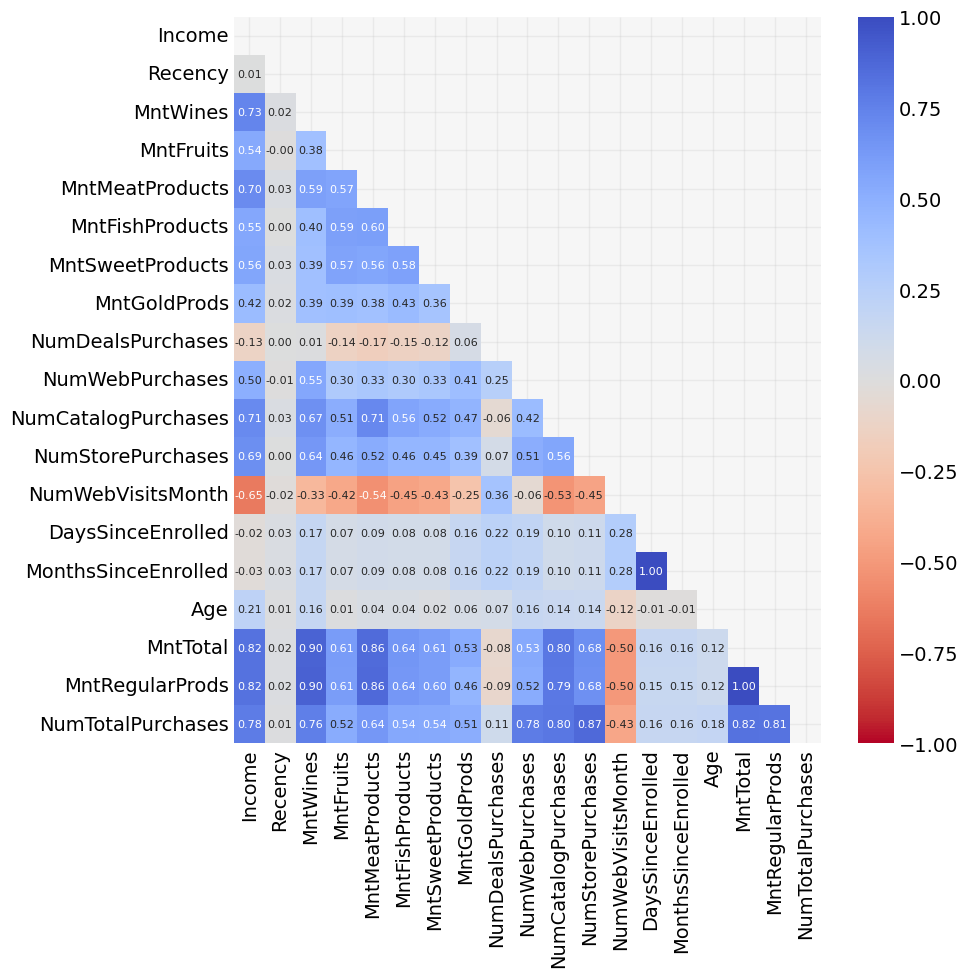

In [32]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(
    corr,
    fmt=".2f",
    ax=ax,
    cmap="coolwarm_r",
    annot=True,
    annot_kws={"fontsize": 8},
    mask=np.triu(corr),
    vmax=1,
    vmin=-1,
)

plt.show()

In [33]:
corr[(corr.abs() > 0.8) & (corr < 1)].unstack().sort_values().dropna().drop_duplicates()

NumCatalogPurchases  NumTotalPurchases    0.803623
MntRegularProds      NumTotalPurchases    0.813091
NumTotalPurchases    MntTotal             0.822488
MntRegularProds      Income               0.823066
Income               MntTotal             0.823770
MntTotal             MntMeatProducts      0.856838
MntMeatProducts      MntRegularProds      0.861392
NumTotalPurchases    NumStorePurchases    0.865477
MntWines             MntTotal             0.897262
MntRegularProds      MntWines             0.902310
MntTotal             MntRegularProds      0.997094
MonthsSinceEnrolled  DaysSinceEnrolled    0.999069
dtype: float64

The columns `MntTotal` and `NumStorePurchases` are going to be kept in order to make a RFM (Recency, Frequency, Monetary) analysis. 

In [34]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'DaysSinceEnrolled', 'MonthsSinceEnrolled',
       'Age', 'AgeGroup', 'MntTotal', 'MntRegularProds', 'Children',
       'HasChildren', 'AcceptedCmpTotal', 'HasAcceptedCmp',
       'NumTotalPurchases'],
      dtype='object')

In [35]:
columns_to_drop = [
    "Age",                # mann_whitney but I will keep AgeGroup for clustering
    "NumDealsPurchases",  # mann_whitney
    "NumWebVisitsMonth",  # mann_whitney
    "DaysSinceEnrolled",  # high corr with MonthsSinceEnrolled. Avoid multicollinearity
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",       # all summarized in HasAcceptedCmp and AcceptedCmpTotal
    "Kidhome",            # summarized in Children and HasChildren
    "Teenhome",           # summarized in Children and HasChildren
]

In [36]:
numeric_continuous_columns = [
    column for column in numeric_continuous_columns if column not in columns_to_drop
]

categorical_columns = [
    column for column in categorical_columns if column not in columns_to_drop
]

In [37]:
numeric_continuous_columns

['Income',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'MonthsSinceEnrolled',
 'MntTotal',
 'MntRegularProds',
 'NumTotalPurchases']

In [38]:
categorical_columns

['Education',
 'Marital_Status',
 'Complain',
 'AgeGroup',
 'Children',
 'HasChildren',
 'AcceptedCmpTotal',
 'HasAcceptedCmp']

In [39]:
df = df.drop(columns=columns_to_drop)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   2205 non-null   int16   
 1   Education            2205 non-null   category
 2   Marital_Status       2205 non-null   category
 3   Income               2205 non-null   float64 
 4   Recency              2205 non-null   int8    
 5   MntWines             2205 non-null   int16   
 6   MntFruits            2205 non-null   int16   
 7   MntMeatProducts      2205 non-null   int16   
 8   MntFishProducts      2205 non-null   int16   
 9   MntSweetProducts     2205 non-null   int16   
 10  MntGoldProds         2205 non-null   int16   
 11  NumWebPurchases      2205 non-null   int8    
 12  NumCatalogPurchases  2205 non-null   int8    
 13  NumStorePurchases    2205 non-null   int8    
 14  Complain             2205 non-null   category
 15  Response             

## Some visualizations

Before exporting the data, let's create some visualizations to better understand the relationships between the features and the target variable.

Boxplots are a great way to visualize the distribution of the features for each class. We can use the `x` and `y` parameters to select features and the `hue` parameter to color the boxes according to the target variable:

<Axes: xlabel='Education', ylabel='Income'>

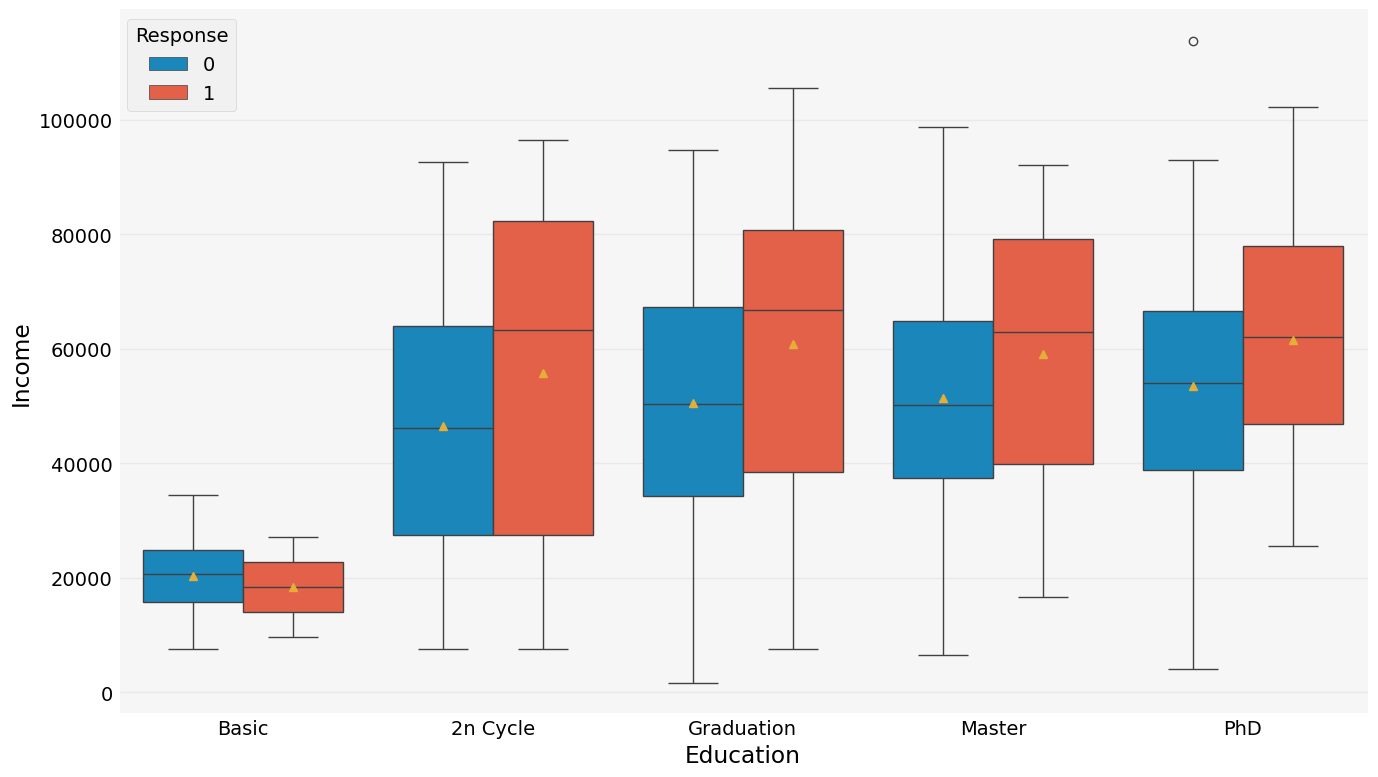

In [40]:
sns.boxplot(data=df, x="Education", y="Income", hue="Response", showmeans=True)

As we have seen before, the higher the education level, the higher the income. In addition, those that have accepted the last campaign have an even higher income than those that have not accepted it in each education level. The exception is the Basic education level, where the income is higher for those that have not accepted the last campaign. However, we have seen that this level has a lower percentage of acceptance of the last campaign.

<Axes: xlabel='AgeGroup', ylabel='Income'>

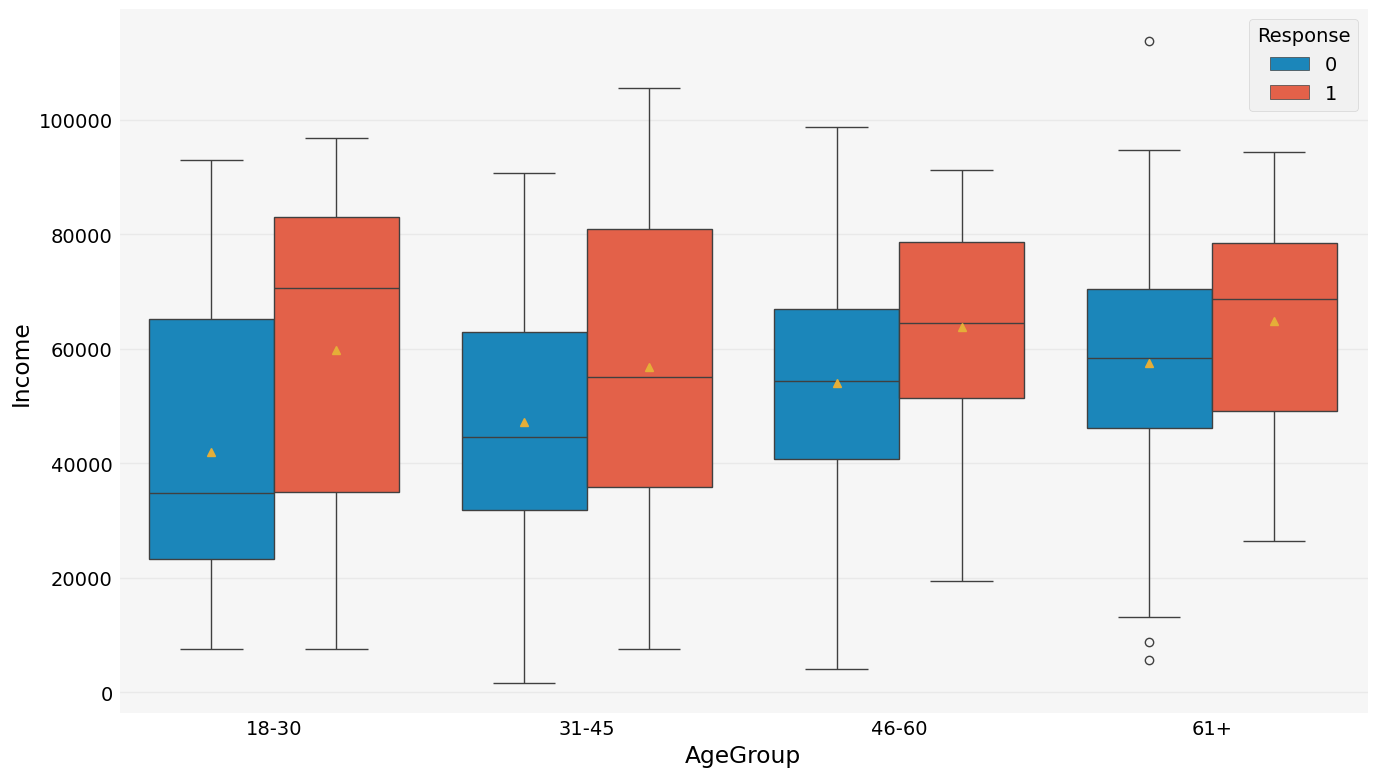

In [41]:
sns.boxplot(data=df, x="AgeGroup", y="Income", hue="Response", showmeans=True)

It seems that age is not a good predictor of the target variable, as the distribution of the ages is similar for each class. However, we can see that the income is higher for those that have accepted the last campaign.

<Axes: xlabel='Education', ylabel='Income'>

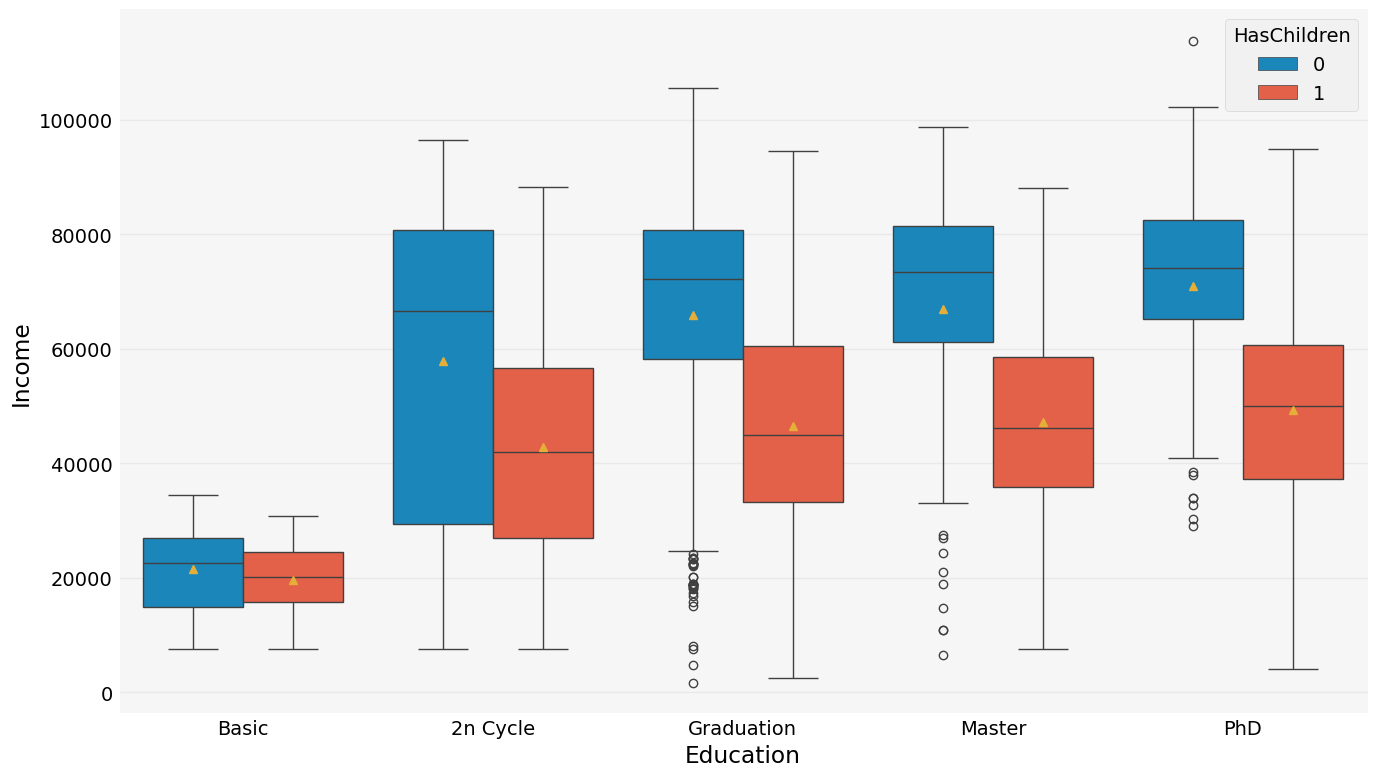

In [42]:
sns.boxplot(data=df, x="Education", y="Income", hue="HasChildren", showmeans=True)

Here is something interesting: those that have children have a lower income than those that do not have children. Especially for higher education levels.

This indicates that the feature `HasChildren` may be useful for predicting the target variable.

<Axes: xlabel='AgeGroup', ylabel='Income'>

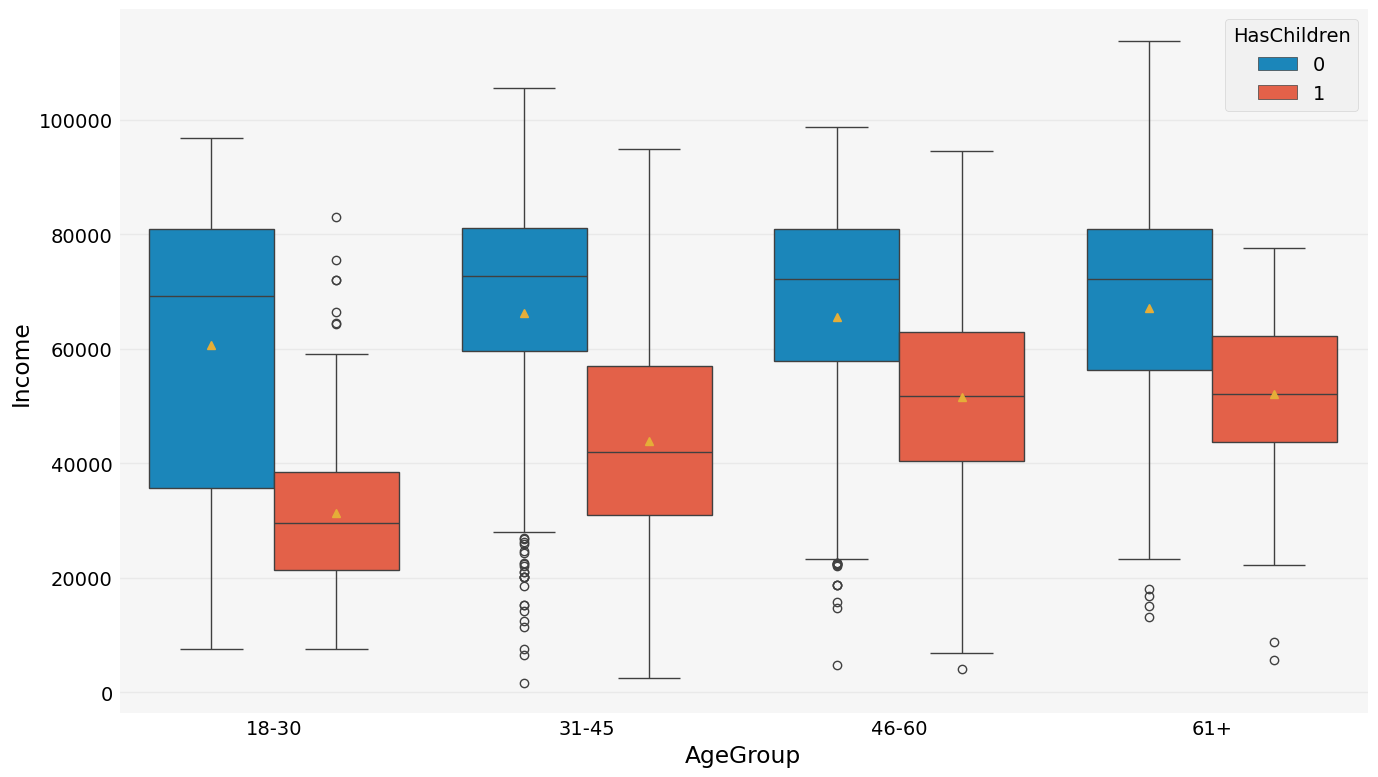

In [43]:
sns.boxplot(data=df, x="AgeGroup", y="Income", hue="HasChildren", showmeans=True)

<Axes: xlabel='AgeGroup', ylabel='Income'>

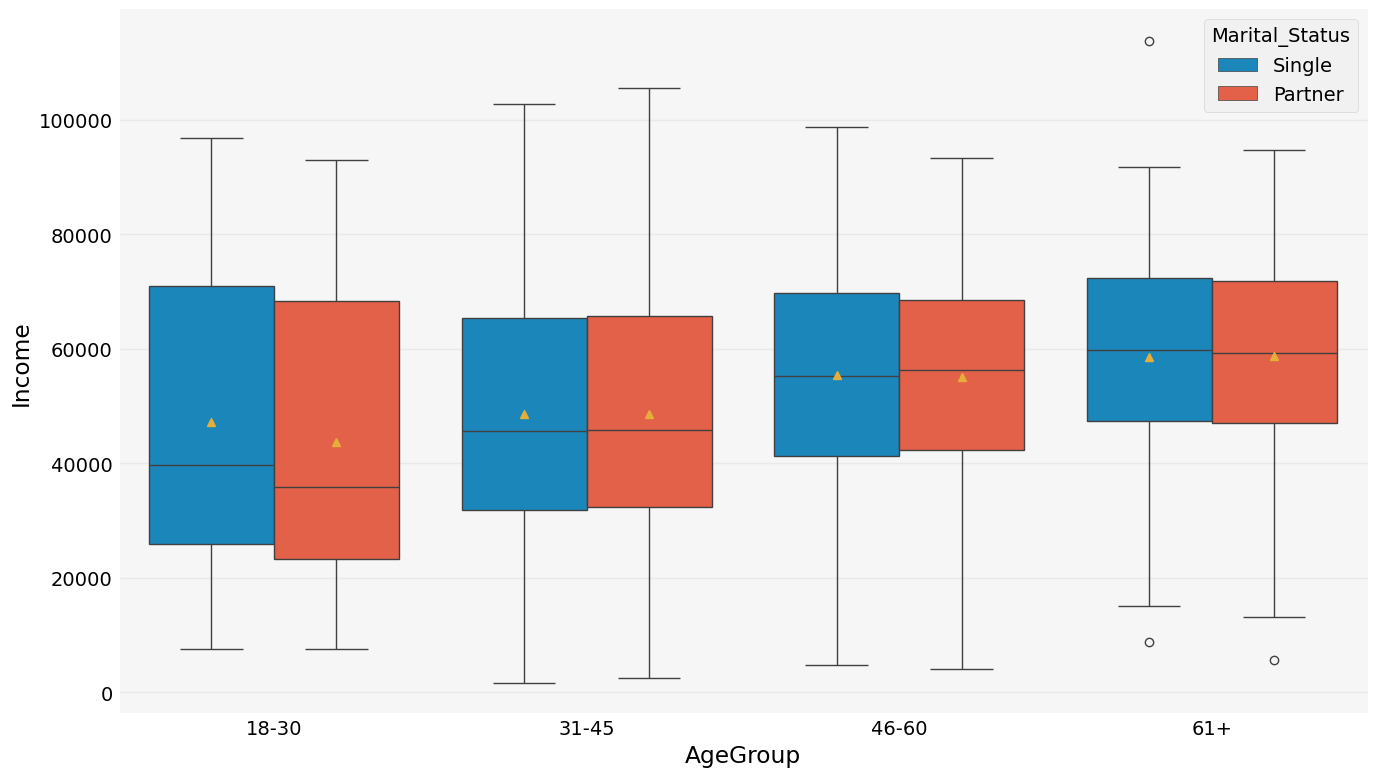

In [44]:
sns.boxplot(data=df, x="AgeGroup", y="Income", hue="Marital_Status", showmeans=True)

The marital status does not seem to have a significant impact on the income regardless of the age group.

<Axes: xlabel='Education', ylabel='MntTotal'>

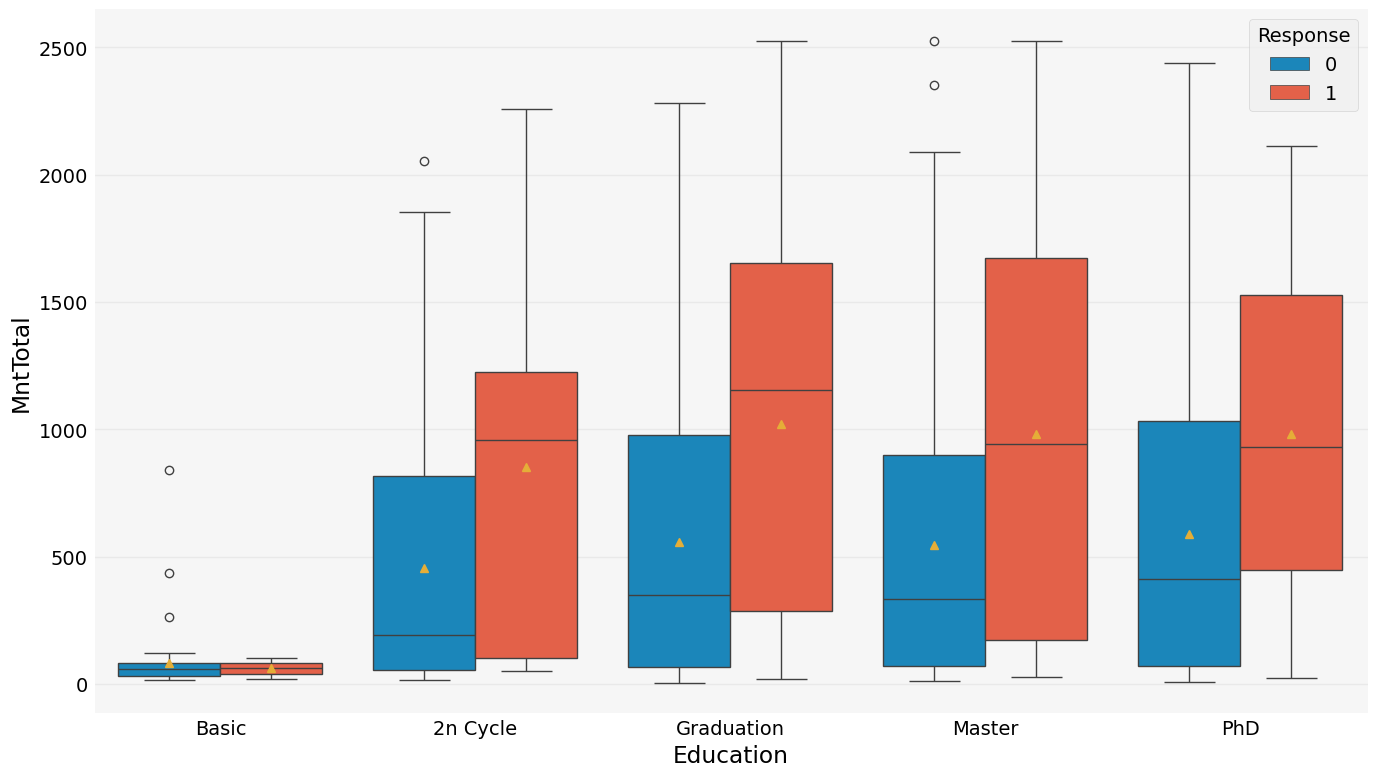

In [45]:
sns.boxplot(data=df, x="Education", y="MntTotal", hue="Response", showmeans=True)

As one could expect, the amount spent is higher for those that have accepted the last campaign.

<Axes: xlabel='AgeGroup', ylabel='MntTotal'>

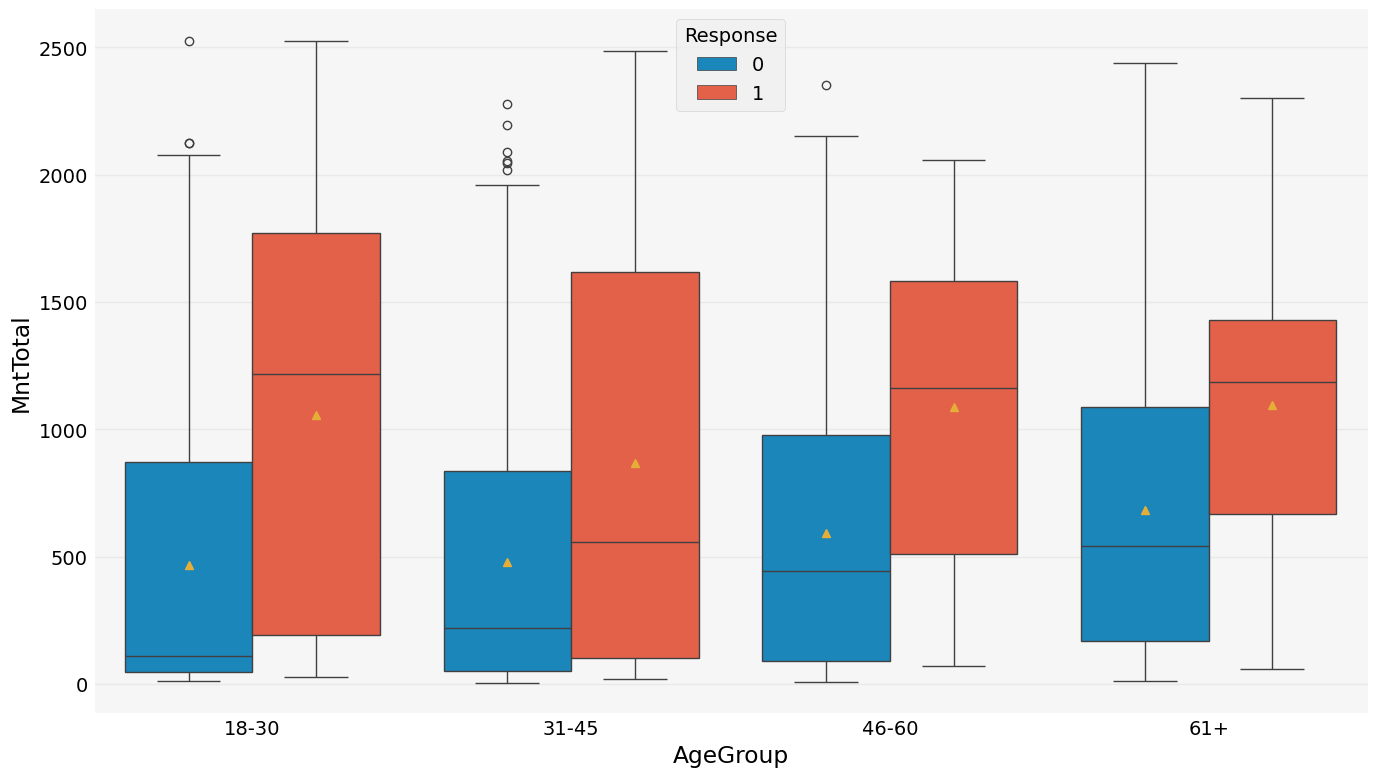

In [46]:
sns.boxplot(data=df, x="AgeGroup", y="MntTotal", hue="Response", showmeans=True)

<Axes: xlabel='Education', ylabel='MntGoldProds'>

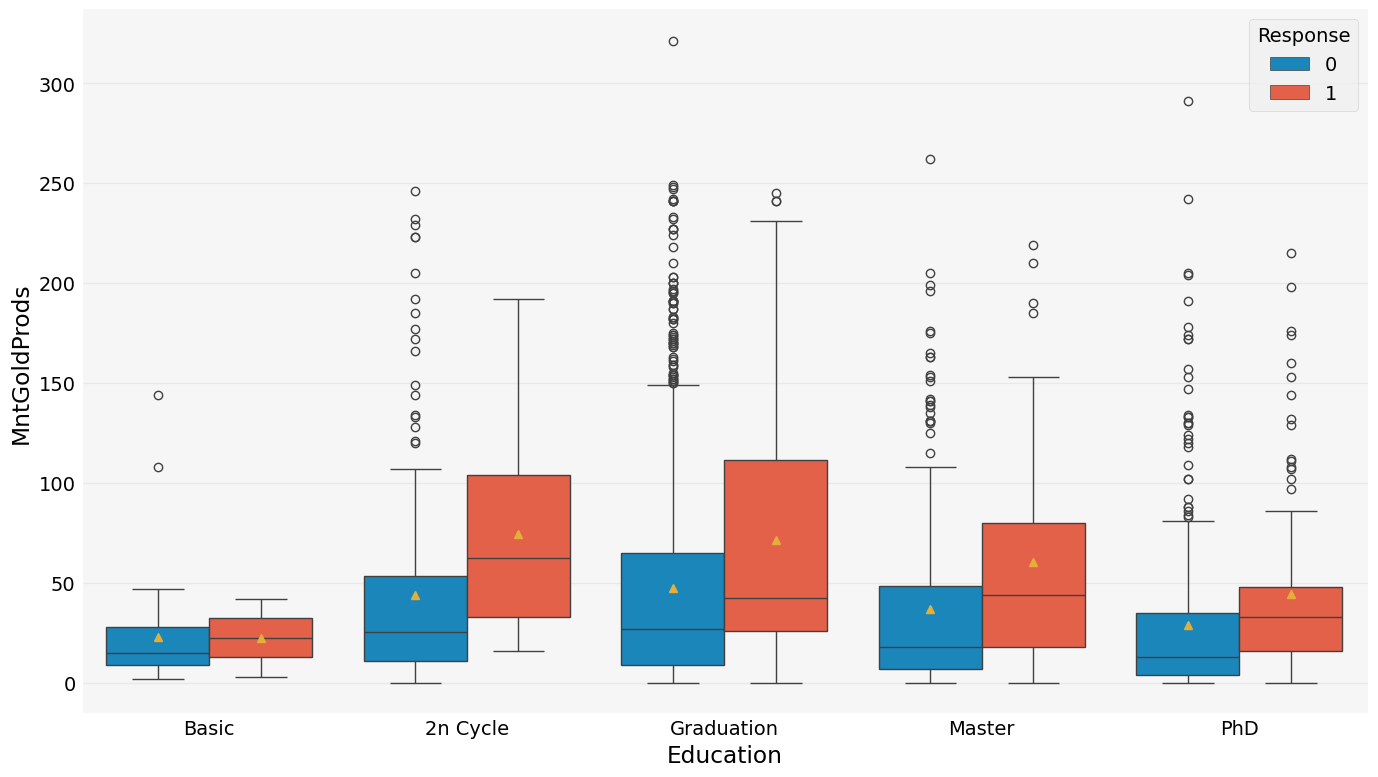

In [47]:
sns.boxplot(data=df, x="Education", y="MntGoldProds", hue="Response", showmeans=True)

<Axes: xlabel='AgeGroup', ylabel='MntGoldProds'>

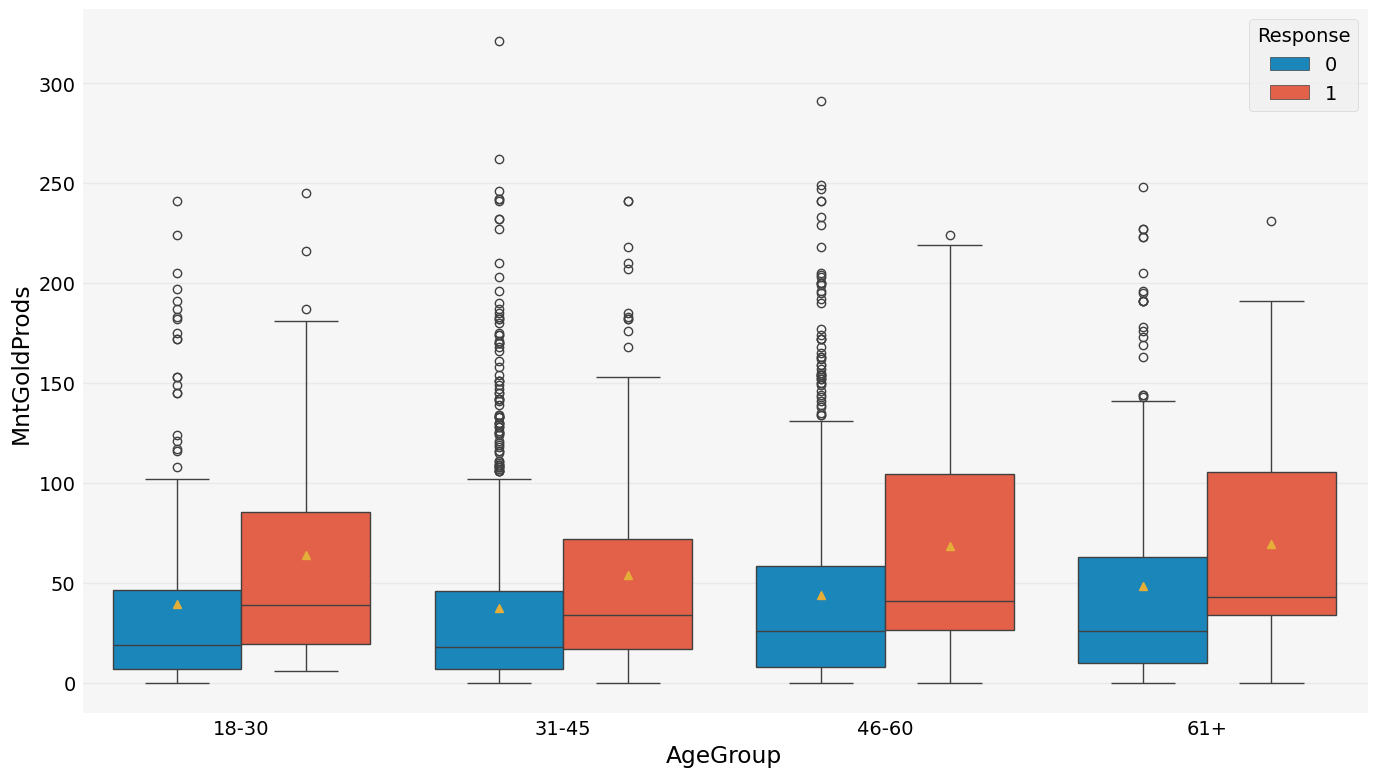

In [48]:
sns.boxplot(data=df, x="AgeGroup", y="MntGoldProds", hue="Response", showmeans=True)

## Export the data

We can now export the data to be used in the next notebook, where we will segment the customers using an RFM analysis.

In [49]:
df.to_parquet(PROCESSED_DATA_FILE, index=False, engine="fastparquet")